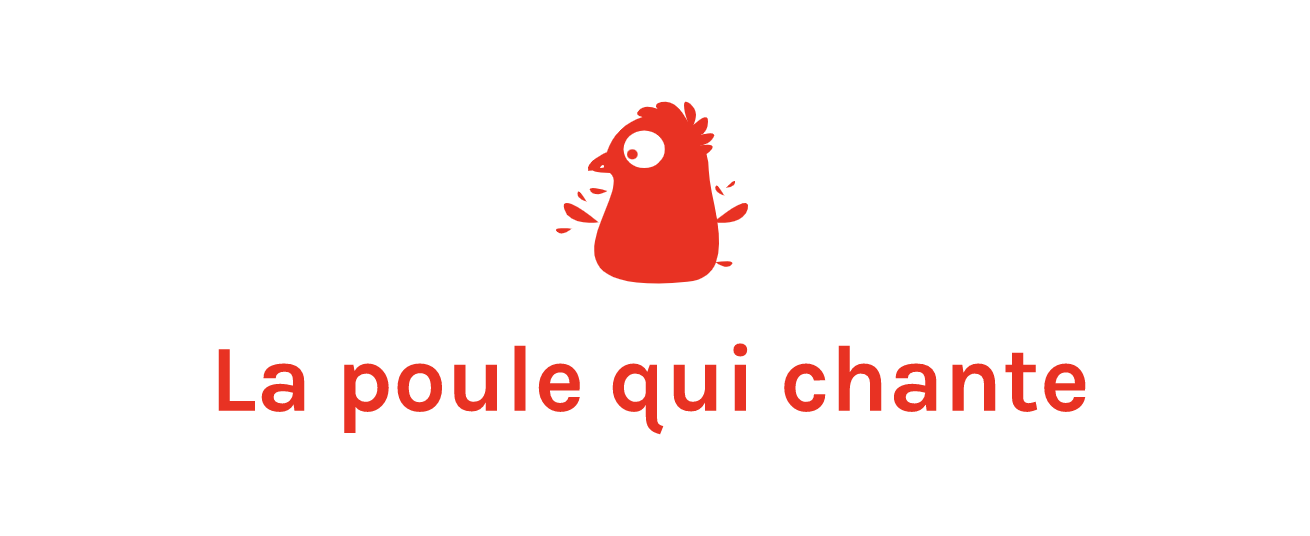

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import plotly.express as px
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn import preprocessing, cluster, metrics, decomposition
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
import scipy.cluster.hierarchy as sch
from sklearn.metrics import silhouette_score
from mpl_toolkits.mplot3d import Axes3D
from sklearn.manifold import TSNE
%matplotlib inline
import warnings

# Scénario
Vous travaillez chez La poule qui chante, une entreprise française d’agroalimentaire. Elle souhaite se développer à l'international.

# Mission
Pars des données de la FAO (Food and Agriculture Organization) que je te mets en pièce jointe pour faire ton analyse. Si tu veux aller plus loin, notamment avec les critères de l’analyse PESTEL, tu peux récupérer et utiliser toutes les données en open data que tu souhaites sur le site de la FAO.

Pour la partie analyse, dans un premier temps j’aimerais que tu testes la classification ascendante hiérarchique, avec un dendrogramme comme visualisation. Ensuite tu pourras utiliser la méthode des k-means, afin d’affiner l’analyse et comparer les résultats des deux méthodes de clustering. N'hésite pas à prendre le temps d’analyser les centroïdes de tes classes. Tu peux également réaliser une ACP afin de visualiser les résultats de ton analyse, comprendre les groupes, les liens entre les variables, les liens entre les individus...

# Sommaire

# Partie 1 : Données
## Disponibilité alimentaire 2017 (tous les aliments)

In [2]:
df_disponibilite_alimentaire_2017 = pd.read_csv(
    "DisponibiliteAlimentaire_2017.csv")
df_population_2000_2018 = pd.read_csv("Population_2000_2018.csv")
Autres_indicateurs = pd.read_csv("Autres_indicateurs.csv")

In [3]:
df_disponibilite_alimentaire_2017.head()

Code Domaine                      Domaine  Code zone         Zone  \
0          FBS  Nouveaux Bilans Alimentaire          2  Afghanistan   
1          FBS  Nouveaux Bilans Alimentaire          2  Afghanistan   
2          FBS  Nouveaux Bilans Alimentaire          2  Afghanistan   
3          FBS  Nouveaux Bilans Alimentaire          2  Afghanistan   
4          FBS  Nouveaux Bilans Alimentaire          2  Afghanistan   

   Code Élément                   Élément  Code Produit          Produit  \
0          5511                Production          2511  Blé et produits   
1          5611   Importations - Quantité          2511  Blé et produits   
2          5072        Variation de stock          2511  Blé et produits   
3          5911   Exportations - Quantité          2511  Blé et produits   
4          5301  Disponibilité intérieure          2511  Blé et produits   

   Code année  Année               Unité  Valeur Symbole  \
0        2017   2017  Milliers de tonnes  4281.0       S   
1        2017   2017  Milliers de tonnes  2302.0       S   
2        2017   2017  Milliers de tonnes  -119.0       S   
3        2017   2017  Milliers de tonnes     0.0       S   
4        2017   2017  Milliers de tonnes  6701.0       S   

  Description du Symbole  
0  Données standardisées  
1  Données standardisées  
2  Données standardisées  
3  Données standardisées  
4  Données standardisées

In [4]:
df_disponibilite_alimentaire_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176600 entries, 0 to 176599
Data columns (total 14 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Code Domaine            176600 non-null  object 
 1   Domaine                 176600 non-null  object 
 2   Code zone               176600 non-null  int64  
 3   Zone                    176600 non-null  object 
 4   Code Élément            176600 non-null  int64  
 5   Élément                 176600 non-null  object 
 6   Code Produit            176600 non-null  int64  
 7   Produit                 176600 non-null  object 
 8   Code année              176600 non-null  int64  
 9   Année                   176600 non-null  int64  
 10  Unité                   176600 non-null  object 
 11  Valeur                  176600 non-null  float64
 12  Symbole                 176600 non-null  object 
 13  Description du Symbole  176600 non-null  object 
dtypes: float64(1), int64

In [5]:
df_disponibilite_alimentaire_2017.nunique()

Code Domaine                 1
Domaine                      1
Code zone                  174
Zone                       174
Code Élément                17
Élément                     17
Code Produit                98
Produit                     98
Code année                   1
Année                        1
Unité                        4
Valeur                    7250
Symbole                      2
Description du Symbole       2
dtype: int64

In [6]:
#pivot table
df_disponibilite_alimentaire_tous_aliments_2017 = pd.pivot_table(
    df_disponibilite_alimentaire_2017, values='Valeur', index="Zone", columns='Élément',aggfunc='sum')

In [7]:
# supression des colonnes
df_disponibilite_alimentaire_tous_aliments_2017 = df_disponibilite_alimentaire_tous_aliments_2017.drop(
    ['Alimentation pour touristes', 'Aliments pour animaux','Disponibilité intérieure',
       'Autres utilisations (non alimentaire)','Disponibilité alimentaire (Kcal/personne/jour)',
       'Disponibilité alimentaire en quantité (kg/personne/an)',
       'Disponibilité de matière grasse en quantité (g/personne/jour)',
       'Disponibilité de protéines en quantité (g/personne/jour)', 'Pertes',
       'Résidus', 'Semences', 'Traitement', 'Variation de stock'], axis=1)

In [8]:
#reset index
df_disponibilite_alimentaire_tous_aliments_2017=df_disponibilite_alimentaire_tous_aliments_2017.reset_index()

## Disponibilité alimentaire 2017 (toutes les viandes)

In [9]:
# visualisation des produits uniques
df_disponibilite_alimentaire_2017.Produit.unique()

array(['Blé et produits', 'Riz et produits', 'Orge et produits',
       'Maïs et produits', 'Seigle et produits', 'Avoine',
       'Millet et produits', 'Sorgho et produits', 'Céréales, Autres',
       'Pommes de Terre et produits', 'Ignames', 'Racines nda',
       'Sucre, canne', 'Sucre, betterave', 'Sucre Eq Brut',
       'Edulcorants Autres', 'Miel', 'Haricots', 'Pois',
       'Légumineuses Autres et produits', 'Noix et produits', 'Soja',
       'Arachides Decortiquees', 'Graines de tournesol',
       'Graines Colza/Moutarde', 'Graines de coton', 'Coco (Incl Coprah)',
       'Sésame', 'Olives', 'Plantes Oleiferes, Autre', 'Huile de Soja',
       "Huile d'Arachide", 'Huile de Tournesol',
       'Huile de Colza&Moutarde', 'Huile Graines de Coton',
       'Huile de Palmistes', 'Huile de Palme', 'Huile de Coco',
       'Huile de Sésame', "Huile d'Olive", 'Huile de Son de Riz',
       'Huile de Germe de Maïs', 'Huil Plantes Oleif Autr',
       'Tomates et produits', 'Oignons', 'Légumes, 

In [10]:
# Création d'une liste avec uniquement les viandes
viandes = ['Viande de Bovins', "Viande d'Ovins/Caprins", 'Viande de Suides',
           'Viande de Volailles', 'Viande, Autre', 'Viande de Anim Aquatiq']

In [11]:
# methode isin()
df_disponibilite_alimentaire_viandes_2017 = df_disponibilite_alimentaire_2017[
    df_disponibilite_alimentaire_2017['Produit'].isin(viandes)]

In [12]:
#pivot table
df_disponibilite_alimentaire_viandes_2017 = pd.pivot_table(
    df_disponibilite_alimentaire_viandes_2017, values='Valeur', index="Zone", columns='Élément',aggfunc='sum')

In [13]:
#colonnes du dataframe
df_disponibilite_alimentaire_viandes_2017.columns

Index(['Alimentation pour touristes', 'Aliments pour animaux',
       'Autres utilisations (non alimentaire)',
       'Disponibilité alimentaire (Kcal/personne/jour)',
       'Disponibilité alimentaire en quantité (kg/personne/an)',
       'Disponibilité de matière grasse en quantité (g/personne/jour)',
       'Disponibilité de protéines en quantité (g/personne/jour)',
       'Disponibilité intérieure', 'Exportations - Quantité',
       'Importations - Quantité', 'Nourriture', 'Pertes', 'Production',
       'Résidus', 'Semences', 'Traitement', 'Variation de stock'],
      dtype='object', name='Élément')

In [14]:
# supression des colonnes
df_disponibilite_alimentaire_viandes_2017 = df_disponibilite_alimentaire_viandes_2017.drop(
    ['Alimentation pour touristes', 'Aliments pour animaux','Disponibilité intérieure',
       'Autres utilisations (non alimentaire)','Disponibilité alimentaire (Kcal/personne/jour)',
       'Disponibilité alimentaire en quantité (kg/personne/an)',
       'Disponibilité de matière grasse en quantité (g/personne/jour)',
       'Disponibilité de protéines en quantité (g/personne/jour)', 'Pertes',
       'Résidus', 'Semences', 'Traitement', 'Variation de stock'], axis=1)

In [15]:
# rename colonnes
df_disponibilite_alimentaire_viandes_2017 = df_disponibilite_alimentaire_viandes_2017 .rename(
    columns={'Exportations - Quantité': "Export viandes", 'Importations - Quantité': "Import viandes",
             'Nourriture': "Conso Viandes", 'Production':'Production viandes'})

In [16]:
#reset index
df_disponibilite_alimentaire_viandes_2017=df_disponibilite_alimentaire_viandes_2017.reset_index()

In [17]:
df_disponibilite_alimentaire_viandes_2017.head()

Élément            Zone  Export viandes  Import viandes  Conso Viandes  \
0           Afghanistan             NaN            35.0          312.0   
1        Afrique du Sud           148.0           571.0         3422.0   
2               Albanie             0.0            51.0          136.0   
3               Algérie             0.0            52.0          748.0   
4             Allemagne          3627.0          2671.0         7255.0   

Élément  Production viandes  
0                     294.0  
1                    3130.0  
2                      90.0  
3                     730.0  
4                    8299.0

## Disponibilité alimentaire 2017 (uniquement Viande de Volailles)

In [18]:
#filtre dispo alimentaire uniquement Viande de Volailles
df_disponibilite_alimentaire_viandes_volailles_2017 = df_disponibilite_alimentaire_2017[
    df_disponibilite_alimentaire_2017['Produit']=='Viande de Volailles']

In [19]:
#pivot table
df_disponibilite_alimentaire_viandes_volailles_2017 = pd.pivot_table(
    df_disponibilite_alimentaire_viandes_volailles_2017, values='Valeur', index="Zone", columns='Élément',aggfunc='sum')

In [20]:
# supression des colonnes
df_disponibilite_alimentaire_viandes_volailles_2017 = df_disponibilite_alimentaire_viandes_volailles_2017.drop(
    ['Alimentation pour touristes', 'Aliments pour animaux','Disponibilité intérieure',
       'Autres utilisations (non alimentaire)','Disponibilité alimentaire (Kcal/personne/jour)',
       'Disponibilité alimentaire en quantité (kg/personne/an)',
       'Disponibilité de matière grasse en quantité (g/personne/jour)',
       'Disponibilité de protéines en quantité (g/personne/jour)', 'Pertes',
       'Résidus', 'Semences', 'Traitement', 'Variation de stock'], axis=1)

In [21]:
# rename colonnes
df_disponibilite_alimentaire_viandes_volailles_2017 = df_disponibilite_alimentaire_viandes_volailles_2017 .rename(
    columns={'Exportations - Quantité': "Export viandes Volailles", 'Importations - Quantité': "Import viandes Volailles",
             'Nourriture': "Conso Viandes Volailles", 'Production':'Production viandes Volailles'})

In [22]:
#reset index
df_disponibilite_alimentaire_viandes_volailles_2017=df_disponibilite_alimentaire_viandes_volailles_2017.reset_index()

## Population 2000 à 2018 (Social)

In [23]:
df_population_2000_2018.head()

Code Domaine                       Domaine  Code zone         Zone  \
0           OA  Séries temporelles annuelles          2  Afghanistan   
1           OA  Séries temporelles annuelles          2  Afghanistan   
2           OA  Séries temporelles annuelles          2  Afghanistan   
3           OA  Séries temporelles annuelles          2  Afghanistan   
4           OA  Séries temporelles annuelles          2  Afghanistan   

   Code Élément            Élément  Code Produit                 Produit  \
0           511  Population totale          3010  Population-Estimations   
1           511  Population totale          3010  Population-Estimations   
2           511  Population totale          3010  Population-Estimations   
3           511  Population totale          3010  Population-Estimations   
4           511  Population totale          3010  Population-Estimations   

   Code année  Année           Unité     Valeur Symbole  \
0        2000   2000  1000 personnes  20779.953       X   
1        2001   2001  1000 personnes  21606.988       X   
2        2002   2002  1000 personnes  22600.770       X   
3        2003   2003  1000 personnes  23680.871       X   
4        2004   2004  1000 personnes  24726.684       X   

          Description du Symbole Note  
0  Sources internationales sûres  NaN  
1  Sources internationales sûres  NaN  
2  Sources internationales sûres  NaN  
3  Sources internationales sûres  NaN  
4  Sources internationales sûres  NaN

In [24]:
df_population_2000_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4411 entries, 0 to 4410
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Code Domaine            4411 non-null   object 
 1   Domaine                 4411 non-null   object 
 2   Code zone               4411 non-null   int64  
 3   Zone                    4411 non-null   object 
 4   Code Élément            4411 non-null   int64  
 5   Élément                 4411 non-null   object 
 6   Code Produit            4411 non-null   int64  
 7   Produit                 4411 non-null   object 
 8   Code année              4411 non-null   int64  
 9   Année                   4411 non-null   int64  
 10  Unité                   4411 non-null   object 
 11  Valeur                  4411 non-null   float64
 12  Symbole                 4411 non-null   object 
 13  Description du Symbole  4411 non-null   object 
 14  Note                    258 non-null    

In [25]:
df_population_2000_2018.nunique()

Code Domaine                 1
Domaine                      1
Code zone                  238
Zone                       238
Code Élément                 1
Élément                      1
Code Produit                 1
Produit                      1
Code année                  19
Année                       19
Unité                        1
Valeur                    4398
Symbole                      2
Description du Symbole       2
Note                         1
dtype: int64

In [26]:
# mise valeur avec l'unité correpondante
df_population_2000_2018['Valeur'] = df_population_2000_2018.apply(
    lambda x: x['Valeur']*1000, axis=1)

In [27]:
#pivot table
df_population_2000_2018 = pd.pivot_table(
    df_population_2000_2018, values='Valeur', index='Zone', columns='Année')

In [28]:
# Conserve les années 2000 et 2017 
df_population_2017 = df_population_2000_2018[[2000,2017]]

In [29]:
# création feature Evolution population 2000 à 2017
df_population_2017['Evolution population 2000 à 2017 (%)'] = df_population_2000_2018.apply(
    lambda x: round((x[2017]-x[2000])/x[2000]*100,2), axis=1)

<ipython-input-29-501bfbac6aac>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_population_2017['Evolution population 2000 à 2017 (%)'] = df_population_2000_2018.apply(


In [30]:
# drop année 2000
df_population_2017= df_population_2017.drop([2000], axis=1)

In [31]:
#reset_index
df_population_2017 = df_population_2017.reset_index()

In [32]:
#rename colonnes
df_population_2017 = df_population_2017.rename(
    columns={2017: "Population 2017"})

## Stabilité politique (Politique)

In [33]:
Autres_indicateurs.head()

Code Domaine                             Domaine  Code zone (FAO)  \
0           FS  Données de la sécurité alimentaire                2   
1           FS  Données de la sécurité alimentaire                2   
2           FS  Données de la sécurité alimentaire                2   
3           FS  Données de la sécurité alimentaire                2   
4           FS  Données de la sécurité alimentaire                2   

          Zone  Code Élément Élément  Code Produit  \
0  Afghanistan          6121  Valeur         21010   
1  Afghanistan          6128  Valeur         22000   
2  Afghanistan          6121  Valeur         21012   
3  Afghanistan          6123  Valeur         21013   
4  Afghanistan          6123  Valeur         21014   

                                             Produit  Code année      Année  \
0  Suffisance des apports énergétiques alimentair...    20162018  2016-2018   
1  Disponibilité alimentaire par habitant utilisé...    20162018  2016-2018   
2  Part des céréales, des racines et des tubercul...    20162018  2016-2018   
3  Disponibilités protéiques moyennes (g/personne...    20162018  2016-2018   
4  Disponibilités protéines moyennes d’origine an...    20162018  2016-2018   

                Unité Valeur  Note  
0                   %    106   NaN  
1  Kcal/personne/jour   2266   NaN  
2                   %     74   NaN  
3     g/personne/jour   55.7   NaN  
4     g/personne/jour   10.7   NaN

In [34]:
Autres_indicateurs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6085 entries, 0 to 6084
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Code Domaine     6085 non-null   object 
 1   Domaine          6085 non-null   object 
 2   Code zone (FAO)  6085 non-null   int64  
 3   Zone             6085 non-null   object 
 4   Code Élément     6085 non-null   int64  
 5   Élément          6085 non-null   object 
 6   Code Produit     6085 non-null   int64  
 7   Produit          6085 non-null   object 
 8   Code année       6085 non-null   int64  
 9   Année            6085 non-null   object 
 10  Unité            6085 non-null   object 
 11  Valeur           5513 non-null   object 
 12  Note             0 non-null      float64
dtypes: float64(1), int64(4), object(8)
memory usage: 618.1+ KB


In [35]:
Autres_indicateurs.nunique()

Code Domaine          1
Domaine               1
Code zone (FAO)     204
Zone                204
Code Élément          9
Élément               1
Code Produit         37
Produit              37
Code année            2
Année                 2
Unité                 9
Valeur             1877
Note                  0
dtype: int64

In [36]:
Autres_indicateurs.Produit.unique()

array(['Suffisance des apports énergétiques alimentaires moyens (%) (moyenne sur 3 ans)',
       "Disponibilité alimentaire par habitant utilisée dans l'estimation de la prévalence de la sous-alimentation (kcal/personne/jour) (moyenne sur 3 ans)",
       'Part des céréales, des racines et des tubercules dans les apports énergétiques alimentaires (%) (moyenne sur 3 ans)',
       'Disponibilités protéiques moyennes (g/personne/jour) (moyenne sur 3 ans)',
       'Disponibilités protéines moyennes d’origine animale (g/personne/jour) (moyenne sur 3 ans)',
       'PIB par habitant, ($ PPA internationaux constants de 2011)',
       'Prévalence de la sous-alimentation (%) (moyenne sur 3 ans)',
       'Nombre de personnes sous-alimentées (millions) (moyenne sur 3 ans)',
       'Prévalence de l’insécurité alimentaire grave – population totale (%) (moyenne sur 3 ans)',
       'Prévalence de l’insécurité alimentaire modérée ou grave – population totale (%) (moyenne sur 3 ans)',
       'Nombre de p

In [37]:
stabilite_politique_2017 = Autres_indicateurs[Autres_indicateurs['Produit']
                                              == 'Stabilité politique et absence de violence/terrorisme (indice)']

In [38]:
stabilite_politique_2017.nunique()

Code Domaine         1
Domaine              1
Code zone (FAO)    197
Zone               197
Code Élément         1
Élément              1
Code Produit         1
Produit              1
Code année           1
Année                1
Unité                1
Valeur             151
Note                 0
dtype: int64

In [39]:
stabilite_politique_2017.columns

Index(['Code Domaine', 'Domaine', 'Code zone (FAO)', 'Zone', 'Code Élément',
       'Élément', 'Code Produit', 'Produit', 'Code année', 'Année', 'Unité',
       'Valeur', 'Note'],
      dtype='object')

In [40]:
# drop
stabilite_politique_2017 = stabilite_politique_2017.drop(['Code Domaine', 'Domaine', 'Code zone (FAO)','Code Élément',
                                                          'Élément', 'Code Produit', 'Code année', 'Année', 'Unité',
                                                          'Produit', 'Note'], axis=1)

In [41]:
#rename colonnes
stabilite_politique_2017 = stabilite_politique_2017.rename(
    columns={"Valeur": 'Index stabilité politique'})

## PIB par hab (Economie)

In [42]:
#filtre PIB
PIB = Autres_indicateurs[Autres_indicateurs['Produit'] == 'PIB par habitant, ($ PPA internationaux constants de 2011)']

In [43]:
# drop
PIB_2017 = PIB.drop(['Code Domaine', 'Domaine', 'Code zone (FAO)', 'Code Élément',
                     'Élément', 'Code Produit', 'Code année', 'Année', 'Unité',
                     'Produit', 'Note'], axis=1)

In [44]:
#rename colonnes
PIB_2017 = PIB_2017.rename(
    columns={"Valeur": 'PIB par habitant'})

In [45]:
PIB_2017

Zone PIB par habitant
5        Afghanistan           2058.4
38    Afrique du Sud          12701.3
71           Albanie            12771
108          Algérie          11737.4
142        Allemagne          52952.9
...              ...              ...
5869         Uruguay          23009.9
5900         Vanuatu           3081.8
5961        Viet Nam           7155.4
6026          Zambie             3485
6057        Zimbabwe           3274.6

[187 rows x 2 columns]

In [46]:
PIB_2017['Zone']=PIB_2017['Zone'].replace("Chine",'Chine, continentale')

In [47]:
Cuba = {'Zone':'Cuba','PIB par habitant':8541}
Yémen = {'Zone':'Yémen','PIB par habitant':960}

In [48]:
PIB_2017 = PIB_2017.append(Cuba, ignore_index=True)
PIB_2017 = PIB_2017.append(Yémen, ignore_index=True)

In [49]:
PIB_2017

Zone PIB par habitant
0       Afghanistan           2058.4
1    Afrique du Sud          12701.3
2           Albanie            12771
3           Algérie          11737.4
4         Allemagne          52952.9
..              ...              ...
184        Viet Nam           7155.4
185          Zambie             3485
186        Zimbabwe           3274.6
187            Cuba             8541
188           Yémen              960

[189 rows x 2 columns]

# Partie 2 : 
## Données dispo alimentaire 2017
### Données dispo alimentaire tous les aliments et viandes

In [50]:
# jointure données disponibilités alimentaire tous les aliments et données disponiilités alimentaire viandes 
df_disponibilités_tous_les_aliments_viandes = pd.merge(
    df_disponibilite_alimentaire_tous_aliments_2017, df_disponibilite_alimentaire_viandes_2017, on="Zone")

In [51]:
df_disponibilités_tous_les_aliments_viandes

Élément                   Zone  Exportations - Quantité  \
0                  Afghanistan                    601.0   
1               Afrique du Sud                  10968.0   
2                      Albanie                    156.0   
3                      Algérie                    743.0   
4                    Allemagne                  58793.0   
..                         ...                      ...   
167        Émirats arabes unis                   4914.0   
168                   Équateur                   8897.0   
169      États-Unis d'Amérique                 207278.0   
170                   Éthiopie                   1259.0   
171               Îles Salomon                    164.0   

Élément  Importations - Quantité  Nourriture  Production  Export viandes  \
0                         4555.0     12968.0     11609.0             NaN   
1                         9020.0     31726.0     68455.0           148.0   
2                          884.0      3631.0      4231.0             0.0   
3                        19718.0     33056.0     26763.0             0.0   
4                        66550.0     77988.0    167828.0          3627.0   
..                           ...         ...         ...             ...   
167                      14986.0      5958.0      1793.0           118.0   
168                       2134.0      9465.0     30843.0             0.0   
169                      84507.0    322036.0    974034.0          7585.0   
170                       2967.0     38502.0     52164.0             0.0   
171                        124.0       419.0      1059.0             0.0   

Élément  Import viandes  Conso Viandes  Production viandes  
0                  35.0          312.0               294.0  
1                 571.0         3422.0              3130.0  
2                  51.0          136.0                90.0  
3                  52.0          748.0               730.0  
4                2671.0         7255.0              8299.0  
..                  ...            ...                 ...  
167               611.0          588.0               159.0  
168                 1.0          759.0               784.0  
169              2337.0        40344.0             45790.0  
170                 2.0          576.0               597.0  
171                 7.0            8.0                 3.0  

[172 rows x 9 columns]

In [52]:
# création des ratios  % export viandes contre export tous aliments 
df_disponibilités_tous_les_aliments_viandes["% Export viandes vs total aliments"] = round(df_disponibilités_tous_les_aliments_viandes["Export viandes"] / \
    df_disponibilités_tous_les_aliments_viandes["Exportations - Quantité"]*100,2)

# création des ratios  % Import viandes contre import tous aliments 
df_disponibilités_tous_les_aliments_viandes["% Import viandes vs total aliments"] = round(df_disponibilités_tous_les_aliments_viandes["Import viandes"] / \
    df_disponibilités_tous_les_aliments_viandes["Importations - Quantité"]*100,2)

# création des ratios  % Conso Viandescontre Conso tous aliments 
df_disponibilités_tous_les_aliments_viandes["% Conso Viandes vs Conso total aliments"] = round(df_disponibilités_tous_les_aliments_viandes["Conso Viandes"] / \
    df_disponibilités_tous_les_aliments_viandes["Nourriture"]*100,2)

# création des ratios  % Production viandes contre Production tous les aliments 
df_disponibilités_tous_les_aliments_viandes["% Production Viandes vs Production total aliments"] = round(df_disponibilités_tous_les_aliments_viandes["Production viandes"] / \
    df_disponibilités_tous_les_aliments_viandes["Production"]*100,2)

In [53]:
df_disponibilités_tous_les_aliments_viandes = df_disponibilités_tous_les_aliments_viandes.fillna(
    0)

In [54]:
df_disponibilités_tous_les_aliments_viandes.columns

Index(['Zone', 'Exportations - Quantité', 'Importations - Quantité',
       'Nourriture', 'Production', 'Export viandes', 'Import viandes',
       'Conso Viandes', 'Production viandes',
       '% Export viandes vs total aliments',
       '% Import viandes vs total aliments',
       '% Conso Viandes vs Conso total aliments',
       '% Production Viandes vs Production total aliments'],
      dtype='object', name='Élément')

In [55]:
df_disponibilités_tous_les_aliments_viandes = df_disponibilités_tous_les_aliments_viandes.drop(['Exportations - Quantité', 'Importations - Quantité',
       'Nourriture', 'Production', 'Export viandes', 'Import viandes',
       'Conso Viandes', 'Production viandes'], axis=1)

In [56]:
df_disponibilités_tous_les_aliments_viandes.head()

Élément            Zone  % Export viandes vs total aliments  \
0           Afghanistan                                0.00   
1        Afrique du Sud                                1.35   
2               Albanie                                0.00   
3               Algérie                                0.00   
4             Allemagne                                6.17   

Élément  % Import viandes vs total aliments  \
0                                      0.77   
1                                      6.33   
2                                      5.77   
3                                      0.26   
4                                      4.01   

Élément  % Conso Viandes vs Conso total aliments  \
0                                           2.41   
1                                          10.79   
2                                           3.75   
3                                           2.26   
4                                           9.30   

Élément  % Production Viandes vs Production total aliments  
0                                                     2.53  
1                                                     4.57  
2                                                     2.13  
3                                                     2.73  
4                                                     4.94

### données dispo alimentaire tous les aliments et viandes volailles

In [57]:
# jointure données disponibilités alimentaire tous les aliments et données disponiilités alimentaire viandes volailles 
df_disponibilités_tous_les_aliments = pd.merge(
    df_disponibilite_alimentaire_tous_aliments_2017, df_disponibilite_alimentaire_viandes_volailles_2017, on="Zone")

In [58]:
# création des ratios  % export viandes volailles contre export tous aliments 
df_disponibilités_tous_les_aliments["% Export viandes Volailles vs total aliments"] = round(df_disponibilités_tous_les_aliments["Export viandes Volailles"] / \
    df_disponibilités_tous_les_aliments["Exportations - Quantité"]*100,2)

# création des ratios  % Import viandes volailles contre import tous aliments 
df_disponibilités_tous_les_aliments["% Import viandes Volailles vs total aliments"] = round(df_disponibilités_tous_les_aliments["Import viandes Volailles"] / \
    df_disponibilités_tous_les_aliments["Importations - Quantité"]*100,2)

# création des ratios  % Conso Viandes volailles contre Conso tous aliments 
df_disponibilités_tous_les_aliments["% Conso Viandes volailles vs Conso total aliments"] = round(df_disponibilités_tous_les_aliments["Conso Viandes Volailles"] / \
    df_disponibilités_tous_les_aliments["Nourriture"]*100,2)

# création des ratios  % Production viandes volailles contre Production tous les aliments 
df_disponibilités_tous_les_aliments["% Production Viandes volailles vs Production total aliments"] = round(df_disponibilités_tous_les_aliments["Production viandes Volailles"] / \
    df_disponibilités_tous_les_aliments["Production"]*100,2)

In [59]:
df_disponibilités_tous_les_aliments = df_disponibilités_tous_les_aliments.fillna(
    0)

In [60]:
df_disponibilités_tous_les_aliments.columns

Index(['Zone', 'Exportations - Quantité', 'Importations - Quantité',
       'Nourriture', 'Production', 'Export viandes Volailles',
       'Import viandes Volailles', 'Conso Viandes Volailles',
       'Production viandes Volailles',
       '% Export viandes Volailles vs total aliments',
       '% Import viandes Volailles vs total aliments',
       '% Conso Viandes volailles vs Conso total aliments',
       '% Production Viandes volailles vs Production total aliments'],
      dtype='object', name='Élément')

In [61]:
df_disponibilités_tous_les_aliments = df_disponibilités_tous_les_aliments.drop(['Exportations - Quantité', 'Importations - Quantité',
       'Nourriture', 'Production', 'Export viandes Volailles',
       'Import viandes Volailles', 'Conso Viandes Volailles',
       'Production viandes Volailles'],axis=1)

In [62]:
df_disponibilités_tous_les_aliments.head()

Élément            Zone  % Export viandes Volailles vs total aliments  \
0           Afghanistan                                          0.00   
1        Afrique du Sud                                          0.57   
2               Albanie                                          0.00   
3               Algérie                                          0.00   
4             Allemagne                                          1.10   

Élément  % Import viandes Volailles vs total aliments  \
0                                                0.64   
1                                                5.70   
2                                                4.30   
3                                                0.01   
4                                                1.27   

Élément  % Conso Viandes volailles vs Conso total aliments  \
0                                                     0.42   
1                                                     6.41   
2                                                     1.29   
3                                                     0.80   
4                                                     2.06   

Élément  % Production Viandes volailles vs Production total aliments  
0                                                     0.24            
1                                                     2.44            
2                                                     0.31            
3                                                     1.03            
4                                                     0.90

### Jointures données dispo alimentaire viandes et viandes volailles

In [63]:
# jointure données disponibilités alimentaire viandes et données disponiilités alimentaire viandes volailles
df_disponibilités_viandes = pd.merge(
    df_disponibilite_alimentaire_viandes_2017, df_disponibilite_alimentaire_viandes_volailles_2017, on="Zone")

In [64]:
# création des ratios  % export viandes volailles contre total viandes
df_disponibilités_viandes["% Export viandes Volailles vs total viandes"] = round(df_disponibilités_viandes["Export viandes Volailles"] / \
    df_disponibilités_viandes["Export viandes"]*100,2)

# création des ratios  % Import viandes volailles contre total viandes
df_disponibilités_viandes["% Import viandes Volailles vs total viandes"] = round(df_disponibilités_viandes["Import viandes Volailles"] / \
    df_disponibilités_viandes["Import viandes"]*100,2)

# création des ratios  % Conso Viandes volailles contre Conso Viandes
df_disponibilités_viandes["% Conso Viandes volailles vs Conso Viandes"] = round(df_disponibilités_viandes["Conso Viandes Volailles"] / \
    df_disponibilités_viandes["Conso Viandes"]*100,2)

# création des ratios  % Production viandes volailles contre Production viandes
df_disponibilités_viandes["% Production Viandes volailles vs Production Viandes"] = round(df_disponibilités_viandes["Production viandes Volailles"] / \
    df_disponibilités_viandes["Production viandes"]*100,2)

In [65]:
df_disponibilités_viandes=df_disponibilités_viandes.fillna(0)

In [66]:
df_disponibilités_viandes.columns

Index(['Zone', 'Export viandes', 'Import viandes', 'Conso Viandes',
       'Production viandes', 'Export viandes Volailles',
       'Import viandes Volailles', 'Conso Viandes Volailles',
       'Production viandes Volailles',
       '% Export viandes Volailles vs total viandes',
       '% Import viandes Volailles vs total viandes',
       '% Conso Viandes volailles vs Conso Viandes',
       '% Production Viandes volailles vs Production Viandes'],
      dtype='object', name='Élément')

In [67]:
df_disponibilités_viandes = df_disponibilités_viandes.drop(['Export viandes', 'Import viandes', 'Conso Viandes',
                                                            'Production viandes'], axis=1)

In [68]:
df_disponibilités_viandes

Élément                   Zone  Export viandes Volailles  \
0                  Afghanistan                       0.0   
1               Afrique du Sud                      63.0   
2                      Albanie                       0.0   
3                      Algérie                       0.0   
4                    Allemagne                     646.0   
..                         ...                       ...   
167        Émirats arabes unis                      94.0   
168                   Équateur                       0.0   
169      États-Unis d'Amérique                    3692.0   
170                   Éthiopie                       0.0   
171               Îles Salomon                       0.0   

Élément  Import viandes Volailles  Conso Viandes Volailles  \
0                            29.0                     55.0   
1                           514.0                   2035.0   
2                            38.0                     47.0   
3                             2.0                    264.0   
4                           842.0                   1609.0   
..                            ...                      ...   
167                         433.0                    412.0   
168                           0.0                    324.0   
169                         123.0                  18100.0   
170                           1.0                     14.0   
171                           6.0                      3.0   

Élément  Production viandes Volailles  \
0                                28.0   
1                              1667.0   
2                                13.0   
3                               275.0   
4                              1514.0   
..                                ...   
167                              48.0   
168                             340.0   
169                           21914.0   
170                              14.0   
171                               0.0   

Élément  % Export viandes Volailles vs total viandes  \
0                                               0.00   
1                                              42.57   
2                                               0.00   
3                                               0.00   
4                                              17.81   
..                                               ...   
167                                            79.66   
168                                             0.00   
169                                            48.68   
170                                             0.00   
171                                             0.00   

Élément  % Import viandes Volailles vs total viandes  \
0                                              82.86   
1                                              90.02   
2                                              74.51   
3                                               3.85   
4                                              31.52   
..                                               ...   
167                                            70.87   
168                                             0.00   
169                                             5.26   
170                                            50.00   
171                                            85.71   

Élément  % Conso Viandes volailles vs Conso Viandes  \
0                                             17.63   
1                                             59.47   
2                                             34.56   
3                                             35.29   
4                                             22.18   
..                                              ...   
167                                           70.07   
168                                           42.69   
169                                           44.86   
170                                            2.43   
171                                           37.50   

Élément  % Production Viandes vola

## Jointures des 3 fichiers dispo alimentaire

In [69]:
# jointure données disponibilités alimentaire tous les aliments et données disponiilités alimentaire viandes 
df_disponibilités_2017 = pd.merge(
    df_disponibilités_tous_les_aliments_viandes, df_disponibilités_tous_les_aliments, on="Zone")

In [70]:
# jointure données disponibilités alimentaire tous les aliments et données disponiilités alimentaire viandes 
df_disponibilités_2017_viandes = pd.merge(
    df_disponibilités_viandes, df_disponibilités_2017, on="Zone")

In [71]:
df_disponibilités_2017_viandes

Élément                   Zone  Export viandes Volailles  \
0                  Afghanistan                       0.0   
1               Afrique du Sud                      63.0   
2                      Albanie                       0.0   
3                      Algérie                       0.0   
4                    Allemagne                     646.0   
..                         ...                       ...   
167        Émirats arabes unis                      94.0   
168                   Équateur                       0.0   
169      États-Unis d'Amérique                    3692.0   
170                   Éthiopie                       0.0   
171               Îles Salomon                       0.0   

Élément  Import viandes Volailles  Conso Viandes Volailles  \
0                            29.0                     55.0   
1                           514.0                   2035.0   
2                            38.0                     47.0   
3                             2.0                    264.0   
4                           842.0                   1609.0   
..                            ...                      ...   
167                         433.0                    412.0   
168                           0.0                    324.0   
169                         123.0                  18100.0   
170                           1.0                     14.0   
171                           6.0                      3.0   

Élément  Production viandes Volailles  \
0                                28.0   
1                              1667.0   
2                                13.0   
3                               275.0   
4                              1514.0   
..                                ...   
167                              48.0   
168                             340.0   
169                           21914.0   
170                              14.0   
171                               0.0   

Élément  % Export viandes Volailles vs total viandes  \
0                                               0.00   
1                                              42.57   
2                                               0.00   
3                                               0.00   
4                                              17.81   
..                                               ...   
167                                            79.66   
168                                             0.00   
169                                            48.68   
170                                             0.00   
171                                             0.00   

Élément  % Import viandes Volailles vs total viandes  \
0                                              82.86   
1                                              90.02   
2                                              74.51   
3                                               3.85   
4                                              31.52   
..                                               ...   
167                                            70.87   
168                                             0.00   
169                                             5.26   
170                                            50.00   
171                                            85.71   

Élément  % Conso Viandes volailles vs Conso Viandes  \
0                                             17.63   
1                                             59.47   
2                                             34.56   
3                                             35.29   
4                                             22.18   
..                                              ...   
167                                           70.07   
168                                           42.69   
169                                           44.86   
170                                            2.43   
171                                           37.50   

Élément  % Production Viandes vola

## Jointures les données PESTEL ( population, stabilité politique,PIB)
### Population

In [72]:
# jointure données population et données disponiilités alimentaire diandes (2)
df_population_2017_disponibilités = pd.merge(
    df_population_2017, df_disponibilités_2017_viandes, on="Zone")

In [73]:
df_population_2017_disponibilités=df_population_2017_disponibilités.dropna()

### Stabilité politique

In [74]:
# jointure
df_population_2017_disponibilités_stabilite_politique = pd.merge( 
    df_population_2017_disponibilités, stabilite_politique_2017, on="Zone",how='left')

In [75]:
df_population_2017_disponibilités_stabilite_politique.head()

Zone  Population 2017  Evolution population 2000 à 2017 (%)  \
0     Afghanistan       36296113.0                                 74.67   
1  Afrique du Sud       57009756.0                                 26.78   
2         Albanie        2884169.0                                 -7.83   
3         Algérie       41389189.0                                 33.33   
4       Allemagne       82658409.0                                  1.54   

   Export viandes Volailles  Import viandes Volailles  \
0                       0.0                      29.0   
1                      63.0                     514.0   
2                       0.0                      38.0   
3                       0.0                       2.0   
4                     646.0                     842.0   

   Conso Viandes Volailles  Production viandes Volailles  \
0                     55.0                          28.0   
1                   2035.0                        1667.0   
2                     47.0                          13.0   
3                    264.0                         275.0   
4                   1609.0                        1514.0   

   % Export viandes Volailles vs total viandes  \
0                                         0.00   
1                                        42.57   
2                                         0.00   
3                                         0.00   
4                                        17.81   

   % Import viandes Volailles vs total viandes  \
0                                        82.86   
1                                        90.02   
2                                        74.51   
3                                         3.85   
4                                        31.52   

   % Conso Viandes volailles vs Conso Viandes  \
0                                       17.63   
1                                       59.47   
2                                       34.56   
3                                       35.29   
4                                       22.18   

   % Production Viandes volailles vs Production Viandes  \
0                                               9.52      
1                                              53.26      
2                                              14.44      
3                                              37.67      
4                                              18.24      

   % Export viandes vs total aliments  % Import viandes vs total aliments  \
0                                0.00                                0.77   
1                                1.35                                6.33   
2                                0.00                                5.77   
3                                0.00                                0.26   
4                                6.17                                4.01   

   % Conso Viandes vs Conso total aliments  \
0                                     2.41   
1                                    10.79   
2                                     3.75   
3                                     2.26   
4                                     9.30   

   % Production Viandes vs Production total aliments  \
0                                               2.53   
1                                               4.57   
2                                               2.13   
3                                               2.73   
4                                               4.94   

   % Export viandes Volailles vs total aliments  \
0                                          0.00   
1                                          0.57   
2                                          0.00   
3                                          0.00   
4                                          1.10   

   % Import viandes Volailles vs total aliments  \
0                                          0.64   
1                                          5.70   
2                                          4.30   
3           

### PIB

In [76]:
# jointure
df_population_2017_disponibilités_stabilite_politique_pib = pd.merge(
    df_population_2017_disponibilités_stabilite_politique, PIB_2017, on="Zone",how='left')

In [77]:
df_population_2017_disponibilités_stabilite_politique_pib.head()

Zone  Population 2017  Evolution population 2000 à 2017 (%)  \
0     Afghanistan       36296113.0                                 74.67   
1  Afrique du Sud       57009756.0                                 26.78   
2         Albanie        2884169.0                                 -7.83   
3         Algérie       41389189.0                                 33.33   
4       Allemagne       82658409.0                                  1.54   

   Export viandes Volailles  Import viandes Volailles  \
0                       0.0                      29.0   
1                      63.0                     514.0   
2                       0.0                      38.0   
3                       0.0                       2.0   
4                     646.0                     842.0   

   Conso Viandes Volailles  Production viandes Volailles  \
0                     55.0                          28.0   
1                   2035.0                        1667.0   
2                     47.0                          13.0   
3                    264.0                         275.0   
4                   1609.0                        1514.0   

   % Export viandes Volailles vs total viandes  \
0                                         0.00   
1                                        42.57   
2                                         0.00   
3                                         0.00   
4                                        17.81   

   % Import viandes Volailles vs total viandes  \
0                                        82.86   
1                                        90.02   
2                                        74.51   
3                                         3.85   
4                                        31.52   

   % Conso Viandes volailles vs Conso Viandes  ...  \
0                                       17.63  ...   
1                                       59.47  ...   
2                                       34.56  ...   
3                                       35.29  ...   
4                                       22.18  ...   

   % Export viandes vs total aliments  % Import viandes vs total aliments  \
0                                0.00                                0.77   
1                                1.35                                6.33   
2                                0.00                                5.77   
3                                0.00                                0.26   
4                                6.17                                4.01   

   % Conso Viandes vs Conso total aliments  \
0                                     2.41   
1                                    10.79   
2                                     3.75   
3                                     2.26   
4                                     9.30   

   % Production Viandes vs Production total aliments  \
0                                               2.53   
1                                               4.57   
2                                               2.13   
3                                               2.73   
4                                               4.94   

   % Export viandes Volailles vs total aliments  \
0                                          0.00   
1                                          0.57   
2                                          0.00   
3                                          0.00   
4                                          1.10   

   % Import viandes Volailles vs total aliments  \
0                                          0.64   
1                                          5.70   
2                                          4.30   
3                                          0.01   
4                                          1.27   

   % Conso Viandes volailles vs Conso total aliments  \
0                                               0.42   
1                                               6.41   
2                                               1.29   
3         

In [78]:
#df dataframe rename
df=df_population_2017_disponibilités_stabilite_politique_pib

In [79]:
#df columns
df.columns

Index(['Zone', 'Population 2017', 'Evolution population 2000 à 2017 (%)',
       'Export viandes Volailles', 'Import viandes Volailles',
       'Conso Viandes Volailles', 'Production viandes Volailles',
       '% Export viandes Volailles vs total viandes',
       '% Import viandes Volailles vs total viandes',
       '% Conso Viandes volailles vs Conso Viandes',
       '% Production Viandes volailles vs Production Viandes',
       '% Export viandes vs total aliments',
       '% Import viandes vs total aliments',
       '% Conso Viandes vs Conso total aliments',
       '% Production Viandes vs Production total aliments',
       '% Export viandes Volailles vs total aliments',
       '% Import viandes Volailles vs total aliments',
       '% Conso Viandes volailles vs Conso total aliments',
       '% Production Viandes volailles vs Production total aliments',
       'Index stabilité politique', 'PIB par habitant'],
      dtype='object')

In [80]:
# réordonner les colonnes du dataframe
df = df.reindex(columns=['Zone', 'Population 2017', 'Evolution population 2000 à 2017 (%)', 'Index stabilité politique',
                         'PIB par habitant', 'Export viandes Volailles', '% Export viandes vs total aliments',
                         '% Export viandes Volailles vs total aliments',
                         '% Export viandes Volailles vs total viandes', 'Import viandes Volailles',
                         '% Import viandes vs total aliments', '% Import viandes Volailles vs total aliments',
                         '% Import viandes Volailles vs total viandes', 'Conso Viandes Volailles',
                         '% Conso Viandes vs Conso total aliments', '% Conso Viandes volailles vs Conso total aliments',
                         '% Conso Viandes volailles vs Conso Viandes', 'Production viandes Volailles',
                         '% Production Viandes vs Production total aliments',
                         '% Production Viandes volailles vs Production total aliments',
                         '% Production Viandes volailles vs Production Viandes'])

In [81]:
df["Index stabilité politique"]=pd.to_numeric(df["Index stabilité politique"])
df["PIB par habitant"]=pd.to_numeric(df["PIB par habitant"])

In [82]:
#mise à 0 pour les 3 pays dont nous savons pas l'index stabilité politique
df['Index stabilité politique'] = df['Index stabilité politique'].fillna(0)

In [83]:
df[df["PIB par habitant"].isna()]

Zone  Population 2017  \
33                    Chine, Taiwan Province de       23674546.0   
107                          Nouvelle-Calédonie         277150.0   
119                         Polynésie française         276102.0   
130  République populaire démocratique de Corée       25429825.0   
158      Venezuela (République bolivarienne du)       29402484.0   

     Evolution population 2000 à 2017 (%)  Index stabilité politique  \
33                                   7.78                       0.86   
107                                 27.56                       0.00   
119                                 14.71                       0.00   
130                                 10.91                      -0.50   
158                                 21.54                      -1.25   

     PIB par habitant  Export viandes Volailles  \
33                NaN                       8.0   
107               NaN                       0.0   
119               NaN                       0.0   
130               NaN                       0.0   
158               NaN                       0.0   

     % Export viandes vs total aliments  \
33                                 0.66   
107                                0.00   
119                                0.00   
130                                0.00   
158                                0.00   

     % Export viandes Volailles vs total aliments  \
33                                           0.48   
107                                          0.00   
119                                          0.00   
130                                          0.00   
158                                          0.00   

     % Export viandes Volailles vs total viandes  Import viandes Volailles  \
33                                         72.73                     161.0   
107                                         0.00                       9.0   
119                                         0.00                      15.0   
130                                         0.00                       0.0   
158                                         0.00                      25.0   

     ...  % Import viandes Volailles vs total aliments  \
33   ...                                          1.12   
107  ...                                          6.04   
119  ...                                          9.55   
130  ...                                          0.00   
158  ...                                          0.54   

     % Import viandes Volailles vs total viandes  Conso Viandes Volailles  \
33                                         40.45                    785.0   
107                                        52.94                     11.0   
119                                        53.57                     13.0   
130                                         0.00                     41.0   
158                                        49.02                    596.0   

     % Conso Viandes vs Conso total aliments  \
33                                     12.11   
107                                    12.74   
119                                    13.98   
130                                     2.78   
158                                     7.66   

     % Conso Viandes volailles vs Conso total aliments  \
33                                                5.18   
107                                               7.01   
119                                               6.99   
130                                               0.33   
158                                               3.80   

     % Conso Viandes volailles vs Conso Viandes  Production viandes Volailles  \
33                                        42.76                         652.0   
107                                       55.00                           1.0   
119                                       50.00                           1.0   
130                                       11.78                          

In [84]:
df[df["PIB par habitant"].isna()]

Zone  Population 2017  \
33                    Chine, Taiwan Province de       23674546.0   
107                          Nouvelle-Calédonie         277150.0   
119                         Polynésie française         276102.0   
130  République populaire démocratique de Corée       25429825.0   
158      Venezuela (République bolivarienne du)       29402484.0   

     Evolution population 2000 à 2017 (%)  Index stabilité politique  \
33                                   7.78                       0.86   
107                                 27.56                       0.00   
119                                 14.71                       0.00   
130                                 10.91                      -0.50   
158                                 21.54                      -1.25   

     PIB par habitant  Export viandes Volailles  \
33                NaN                       8.0   
107               NaN                       0.0   
119               NaN                       0.0   
130               NaN                       0.0   
158               NaN                       0.0   

     % Export viandes vs total aliments  \
33                                 0.66   
107                                0.00   
119                                0.00   
130                                0.00   
158                                0.00   

     % Export viandes Volailles vs total aliments  \
33                                           0.48   
107                                          0.00   
119                                          0.00   
130                                          0.00   
158                                          0.00   

     % Export viandes Volailles vs total viandes  Import viandes Volailles  \
33                                         72.73                     161.0   
107                                         0.00                       9.0   
119                                         0.00                      15.0   
130                                         0.00                       0.0   
158                                         0.00                      25.0   

     ...  % Import viandes Volailles vs total aliments  \
33   ...                                          1.12   
107  ...                                          6.04   
119  ...                                          9.55   
130  ...                                          0.00   
158  ...                                          0.54   

     % Import viandes Volailles vs total viandes  Conso Viandes Volailles  \
33                                         40.45                    785.0   
107                                        52.94                     11.0   
119                                        53.57                     13.0   
130                                         0.00                     41.0   
158                                        49.02                    596.0   

     % Conso Viandes vs Conso total aliments  \
33                                     12.11   
107                                    12.74   
119                                    13.98   
130                                     2.78   
158                                     7.66   

     % Conso Viandes volailles vs Conso total aliments  \
33                                                5.18   
107                                               7.01   
119                                               6.99   
130                                               0.33   
158                                               3.80   

     % Conso Viandes volailles vs Conso Viandes  Production viandes Volailles  \
33                                        42.76                         652.0   
107                                       55.00                           1.0   
119                                       50.00                           1.0   
130                                       11.78                          

# Partie 3 : Répartition des pays
## Code ISO

In [85]:
# Intégration d'un fichier ISO_pays pour utiliser plotly.express
df_iso_pays = pd.read_html("https://fr.wikipedia.org/wiki/ISO_3166-1#Table_de_codage")
df_iso_pays[0].to_csv("iso_pays")
df_iso_pays = pd.read_csv("iso_pays")

In [86]:
df_iso_pays = df_iso_pays[['alpha-3','Nom français']]

In [87]:
df_iso_pays = df_iso_pays.rename(columns = {'alpha-3': 'Code ISO','Nom français':'Zone'})

In [88]:
df_iso_pays

Code ISO              Zone
0        AFG       Afghanistan
1        ZAF    Afrique du Sud
2        ALA        Îles Åland
3        ALB           Albanie
4        DZA           Algérie
..       ...               ...
244      VNM          Viêt Nam
245      WLF  Wallis-et-Futuna
246      YEM             Yémen
247      ZMB            Zambie
248      ZWE          Zimbabwe

[249 rows x 2 columns]

In [89]:
pays = df_iso_pays['Zone'].to_list()

In [90]:
df['Zone']=df['Zone'].replace(["Bolivie (État plurinational de)",'Bélarus','Cabo Verde',
                              'Chine - RAS de Hong-Kong',"Chine - RAS de Macao",'Chine, continentale',"Congo",
                              "El Salvador",'Fédération de Russie',"Iran (République islamique d')",
                              'Iraq','Libéria','Nigéria',
                              "Royaume-Uni de Grande-Bretagne et d'Irlande du Nord",
                              'République de Corée',
                              'République de Moldova',
                              'République démocratique populaire lao',"République-Unie de Tanzanie",
                               "Saint-Vincent-et-les Grenadines","Timor-Leste","Viet Nam","États-Unis d'Amérique"],
                              ['Bolivie','Biélorussie','Cap-Vert',
                               'Hong Kong','Macao','Chine','République du Congo',"Salvador",'Russie','Iran',
                               'Irak','Liberia','Nigeria','Royaume-Uni',
                               'Corée du Nord','Moldavie','Laos','Tanzanie','Saint-Vincent-et-les-Grenadines',
                               'Timor oriental','Viêt Nam','États-Unis'])

In [91]:
df = pd.merge(df_iso_pays,df, on="Zone")

In [92]:
df[df['PIB par habitant'].isna()]

Code ISO                 Zone  Population 2017  \
114      NCL   Nouvelle-Calédonie         277150.0   
126      PYF  Polynésie française         276102.0   

     Evolution population 2000 à 2017 (%)  Index stabilité politique  \
114                                 27.56                        0.0   
126                                 14.71                        0.0   

     PIB par habitant  Export viandes Volailles  \
114               NaN                       0.0   
126               NaN                       0.0   

     % Export viandes vs total aliments  \
114                                 0.0   
126                                 0.0   

     % Export viandes Volailles vs total aliments  \
114                                           0.0   
126                                           0.0   

     % Export viandes Volailles vs total viandes  ...  \
114                                          0.0  ...   
126                                          0.0  ...   

     % Import viandes Volailles vs total aliments  \
114                                          6.04   
126                                          9.55   

     % Import viandes Volailles vs total viandes  Conso Viandes Volailles  \
114                                        52.94                     11.0   
126                                        53.57                     13.0   

     % Conso Viandes vs Conso total aliments  \
114                                    12.74   
126                                    13.98   

     % Conso Viandes volailles vs Conso total aliments  \
114                                               7.01   
126                                               6.99   

     % Conso Viandes volailles vs Conso Viandes  Production viandes Volailles  \
114                                        55.0                           1.0   
126                                        50.0                           1.0   

     % Production Viandes vs Production total aliments  \
114                                               8.99   
126                                               0.87   

     % Production Viandes volailles vs Production total aliments  \
114                                               1.12             
126                                               0.43             

     % Production Viandes volailles vs Production Viandes  
114                                               12.5     
126                                               50.0     

[2 rows x 22 columns]

In [93]:
#supression des deux pays dont nous n'avons pas l'information du PIB
df.dropna(axis=0, inplace=True)

## Analyses des données
### les pays exportateurs de viandes de volailles

In [94]:
# les plus gros exportateurs de viandes de volailles
df.sort_values(by='Export viandes Volailles',ascending=False, inplace=True)
df.head(10)

Code ISO        Zone  Population 2017  \
23       BRA      Brésil     2.078338e+08   
51       USA  États-Unis     3.250848e+08   
122      NLD    Pays-Bas     1.702135e+07   
125      POL     Pologne     3.795318e+07   
150      THA   Thaïlande     6.920981e+07   
68       HKG   Hong Kong     7.306322e+06   
17       BEL    Belgique     1.141975e+07   
4        DEU   Allemagne     8.265841e+07   
32       CHN       Chine     1.421022e+09   
55       FRA      France     6.484251e+07   

     Evolution population 2000 à 2017 (%)  Index stabilité politique  \
23                                  18.90                      -0.42   
51                                  15.40                       0.34   
122                                  6.88                       0.92   
125                                 -1.57                       0.52   
150                                  9.94                      -0.75   
68                                  10.60                       0.83   
17                                  11.07                       0.43   
4                                    1.54                       0.59   
32                                  10.11                       0.00   
55                                   9.87                       0.28   

     PIB par habitant  Export viandes Volailles  \
23            14524.6                    4223.0   
51            60109.7                    3692.0   
122           55088.6                    1418.0   
125           30064.5                    1025.0   
150           17423.0                     796.0   
68            59849.2                     663.0   
17            50442.3                     656.0   
4             52952.9                     646.0   
32            14621.2                     576.0   
55            44577.1                     501.0   

     % Export viandes vs total aliments  \
23                                 4.70   
51                                 3.66   
122                                5.82   
125                                9.85   
150                                1.28   
68                                23.14   
17                                 5.41   
4                                  6.17   
32                                 2.22   
55                                 2.25   

     % Export viandes Volailles vs total aliments  \
23                                           2.74   
51                                           1.78   
122                                          2.41   
125                                          4.30   
150                                          1.18   
68                                          18.37   
17                                           2.02   
4                                            1.10   
32                                           1.43   
55                                           0.84   

     % Export viandes Volailles vs total viandes  ...  \
23                                         58.43  ...   
51                                         48.68  ...   
122                                        41.37  ...   
125                                        43.71  ...   
150                                        92.34  ...   
68                                         79.40  ...   
17                                         37.38  ...   
4                                          17.81  ...   
32                                         64.43  ...   
55                                         37.28  ...   

     % Import viandes Volailles vs total aliments  \
23                                           0.02   
51                                           0.15   
122                                          1.01   
125                                          0.39   
150                                          0.02   
68                                           9.40   
17                                           0.87   
4                                          

In [95]:
fig = px.choropleth(df, locations='Code ISO', color='Export viandes Volailles', color_continuous_scale= 'sunsetdark', labels={'Proportion': '%'})
fig.update_layout(
    title_text = 'Les pays exportateurs de viandes de volailles 2017', title_x = 0.5,
    font = dict(size=10))
fig.show()

### Les pays importateurs de viandes de volailles

In [96]:
# les plus gros importateurs de viandes de volailles
df.sort_values(by='Import viandes Volailles',ascending=False, inplace=True)
df.head(10)

Code ISO             Zone  Population 2017  \
79       JPN            Japon      127502725.0   
104      MEX          Mexique      124777324.0   
68       HKG        Hong Kong        7306322.0   
4        DEU        Allemagne       82658409.0   
129      GBR      Royaume-Uni       66727461.0   
7        SAU  Arabie saoudite       33101179.0   
122      NLD         Pays-Bas       17021347.0   
1        ZAF   Afrique du Sud       57009756.0   
55       FRA           France       64842509.0   
73       IRQ             Irak       37552781.0   

     Evolution population 2000 à 2017 (%)  Index stabilité politique  \
79                                  -0.02                       1.11   
104                                 26.17                      -0.72   
68                                  10.60                       0.83   
4                                    1.54                       0.59   
129                                 13.24                       0.33   
7                                   60.19                      -0.58   
122                                  6.88                       0.92   
1                                   26.78                      -0.28   
55                                   9.87                       0.28   
73                                  59.82                      -2.31   

     PIB par habitant  Export viandes Volailles  \
79            40966.6                      10.0   
104           19721.3                       9.0   
68            59849.2                     663.0   
4             52952.9                     646.0   
129           45744.7                     359.0   
7             47306.2                      10.0   
122           55088.6                    1418.0   
1             12701.3                      63.0   
55            44577.1                     501.0   
73            10719.0                       0.0   

     % Export viandes vs total aliments  \
79                                 1.12   
104                                1.64   
68                                23.14   
4                                  6.17   
129                                5.94   
7                                  0.80   
122                                5.82   
1                                  1.35   
55                                 2.25   
73                                 0.00   

     % Export viandes Volailles vs total aliments  \
79                                           0.59   
104                                          0.04   
68                                          18.37   
4                                            1.10   
129                                          2.45   
7                                            0.45   
122                                          2.41   
1                                            0.57   
55                                           0.84   
73                                           0.00   

     % Export viandes Volailles vs total viandes  ...  \
79                                         52.63  ...   
104                                         2.17  ...   
68                                         79.40  ...   
4                                          17.81  ...   
129                                        41.22  ...   
7                                          55.56  ...   
122                                        41.37  ...   
1                                          42.57  ...   
55                                         37.28  ...   
73                                          0.00  ...   

     % Import viandes Volailles vs total aliments  \
79                                           2.13   
104                                          2.18   
68                                           9.40   
4                                            1.27   
129                                          2.05   
7                                            2.73   
122                                      

In [97]:
fig = px.choropleth(df, locations='Code ISO', color='Import viandes Volailles', color_continuous_scale= 'sunsetdark', labels={'Proportion': '%'})
fig.update_layout(
    title_text = 'Les pays importateurs de viandes de volailles 2017', title_x = 0.5,
    font = dict(size=10))
fig.show()

### Les pays producteurs de viandes de volailles

In [98]:
# les plus gros producteurs de viandes de volailles
df.sort_values(by='Production viandes Volailles',ascending=False, inplace=True)
df.head(10)

Code ISO        Zone  Population 2017  \
51       USA  États-Unis     3.250848e+08   
32       CHN       Chine     1.421022e+09   
23       BRA      Brésil     2.078338e+08   
130      RUS      Russie     1.455301e+08   
70       IND        Inde     1.338677e+09   
104      MEX     Mexique     1.247773e+08   
125      POL     Pologne     3.795318e+07   
71       IDN   Indonésie     2.646510e+08   
79       JPN       Japon     1.275027e+08   
156      TUR     Turquie     8.111645e+07   

     Evolution population 2000 à 2017 (%)  Index stabilité politique  \
51                                  15.40                       0.34   
32                                  10.11                       0.00   
23                                  18.90                      -0.42   
130                                 -0.60                      -0.64   
70                                  26.70                      -0.76   
104                                 26.17                      -0.72   
125                                 -1.57                       0.52   
71                                  25.12                      -0.50   
79                                  -0.02                       1.11   
156                                 28.27                      -1.79   

     PIB par habitant  Export viandes Volailles  \
51            60109.7                    3692.0   
32            14621.2                     576.0   
23            14524.6                    4223.0   
130           25926.4                     115.0   
70             6182.9                       4.0   
104           19721.3                       9.0   
125           30064.5                    1025.0   
71            10935.6                       0.0   
79            40966.6                      10.0   
156           27913.8                     429.0   

     % Export viandes vs total aliments  \
51                                 3.66   
32                                 2.22   
23                                 4.70   
130                                0.37   
70                                 3.85   
104                                1.64   
125                                9.85   
71                                 0.01   
79                                 1.12   
156                                2.42   

     % Export viandes Volailles vs total aliments  \
51                                           1.78   
32                                           1.43   
23                                           2.74   
130                                          0.20   
70                                           0.01   
104                                          0.04   
125                                          4.30   
71                                           0.00   
79                                           0.59   
156                                          2.32   

     % Export viandes Volailles vs total viandes  ...  \
51                                         48.68  ...   
32                                         64.43  ...   
23                                         58.43  ...   
130                                        54.50  ...   
70                                          0.30  ...   
104                                         2.17  ...   
125                                        43.71  ...   
71                                          0.00  ...   
79                                         52.63  ...   
156                                        95.97  ...   

     % Import viandes Volailles vs total aliments  \
51                                           0.15   
32                                           0.22   
23                                           0.02   
130                                          0.94   
70                                           0.00   
104                                          2.18   
125                                          0.39   
71                                         

In [99]:
fig = px.choropleth(df, locations='Code ISO', color='Production viandes Volailles', color_continuous_scale= 'sunsetdark', labels={'Proportion': '%'})
fig.update_layout(
    title_text = 'Les pays producteurs de viandes de volailles 2017', title_x = 0.5,
    font = dict(size=10))
fig.show()

### Les pays consommateurs de viandes de volailles

In [100]:
# les plus gros consommateurs de viandes de volailles
df.sort_values(by='Conso Viandes Volailles',ascending=False, inplace=True)
df.head(10)

Code ISO            Zone  Population 2017  \
51       USA      États-Unis     3.250848e+08   
32       CHN           Chine     1.421022e+09   
23       BRA          Brésil     2.078338e+08   
130      RUS          Russie     1.455301e+08   
104      MEX         Mexique     1.247773e+08   
70       IND            Inde     1.338677e+09   
79       JPN           Japon     1.275027e+08   
72       IRN            Iran     8.067388e+07   
129      GBR     Royaume-Uni     6.672746e+07   
1        ZAF  Afrique du Sud     5.700976e+07   

     Evolution population 2000 à 2017 (%)  Index stabilité politique  \
51                                  15.40                       0.34   
32                                  10.11                       0.00   
23                                  18.90                      -0.42   
130                                 -0.60                      -0.64   
104                                 26.17                      -0.72   
70                                  26.70                      -0.76   
79                                  -0.02                       1.11   
72                                  22.93                      -0.93   
129                                 13.24                       0.33   
1                                   26.78                      -0.28   

     PIB par habitant  Export viandes Volailles  \
51            60109.7                    3692.0   
32            14621.2                     576.0   
23            14524.6                    4223.0   
130           25926.4                     115.0   
104           19721.3                       9.0   
70             6182.9                       4.0   
79            40966.6                      10.0   
72            14535.9                      45.0   
129           45744.7                     359.0   
1             12701.3                      63.0   

     % Export viandes vs total aliments  \
51                                 3.66   
32                                 2.22   
23                                 4.70   
130                                0.37   
104                                1.64   
70                                 3.85   
79                                 1.12   
72                                 0.67   
129                                5.94   
1                                  1.35   

     % Export viandes Volailles vs total aliments  \
51                                           1.78   
32                                           1.43   
23                                           2.74   
130                                          0.20   
104                                          0.04   
70                                           0.01   
79                                           0.59   
72                                           0.63   
129                                          2.45   
1                                            0.57   

     % Export viandes Volailles vs total viandes  ...  \
51                                         48.68  ...   
32                                         64.43  ...   
23                                         58.43  ...   
130                                        54.50  ...   
104                                         2.17  ...   
70                                          0.30  ...   
79                                         52.63  ...   
72                                         93.75  ...   
129                                        41.22  ...   
1                                          42.57  ...   

     % Import viandes Volailles vs total aliments  \
51                                           0.15   
32                                           0.22   
23                                           0.02   
130                                          0.94   
104                                          2.18   
70                                           0.00   
79                                           2.13   

In [101]:
fig = px.choropleth(df, locations='Code ISO', color='Conso Viandes Volailles', color_continuous_scale= 'sunsetdark', labels={'Proportion': '%'})
fig.update_layout(
    title_text = 'Les pays consommateurs de viandes de volailles 2017', title_x = 0.5,
    font = dict(size=10))
fig.show()

# Partie 4 :

## Classification ascendante hiérarchique

In [102]:
# Données
X = df.select_dtypes('number') 
print('X', X.shape)

X (162, 20)


In [103]:
# Etiquettes des échantillons
y = df['Zone']
print('y', y.shape, y.unique())

y (162,) ['États-Unis' 'Chine' 'Brésil' 'Russie' 'Mexique' 'Inde' 'Japon' 'Iran'
 'Royaume-Uni' 'Afrique du Sud' 'Indonésie' 'Argentine' 'Turquie'
 'Allemagne' 'Colombie' 'France' 'Philippines' 'Arabie saoudite' 'Canada'
 'Espagne' 'Égypte' 'Malaisie' 'Pakistan' 'Australie' 'Viêt Nam' 'Pologne'
 'Italie' 'Ukraine' 'Thaïlande' 'Corée du Nord' 'Maroc' 'Chili' 'Irak'
 'Israël' 'Pérou' 'Émirats arabes unis' 'Bolivie' 'Hong Kong' 'Roumanie'
 'République dominicaine' 'Guatemala' 'Pays-Bas' 'Kazakhstan' 'Équateur'
 'Portugal' 'Angola' 'Jordanie' 'Cuba' 'Algérie' 'Biélorussie' 'Hongrie'
 'Bangladesh' 'Yémen' 'Tchéquie' 'Ghana' 'Honduras' 'Tunisie' 'Nigeria'
 'Koweït' 'Danemark' 'Suède' 'Nouvelle-Zélande' 'Sri Lanka' 'Grèce'
 'Bénin' 'Autriche' 'Bulgarie' 'Jamaïque' 'Belgique' 'Panama' 'Nicaragua'
 'Suisse' 'Costa Rica' 'Salvador' 'Azerbaïdjan' 'Irlande'
 'République du Congo' 'Tanzanie' 'Finlande' 'Mozambique' 'Norvège' 'Oman'
 'Haïti' 'Malawi' 'Lituanie' 'Cameroun' 'Slovaquie' 'Trinité-et-Tob

### Appliquer une normalisation centrée-réduite
Une normalisation de données est nécessaire pour ramener les niveaux d'expression de gènes à la même échelle. Pour des raisons pédagogiques, on réalise ici une normalisation centrée-réduite explicitement dans une étape séparée. Il est néanmoins possible de l'intégrer à la dernière étape du pipeline, simplement en option de la méthode clustermap de la librairie seaborn.

In [104]:
scaler = preprocessing.StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, index=X.index, columns=X.columns)
print('X_scaled', X_scaled.shape)

X_scaled (162, 20)


### Réaliser un clustering hiérarchique

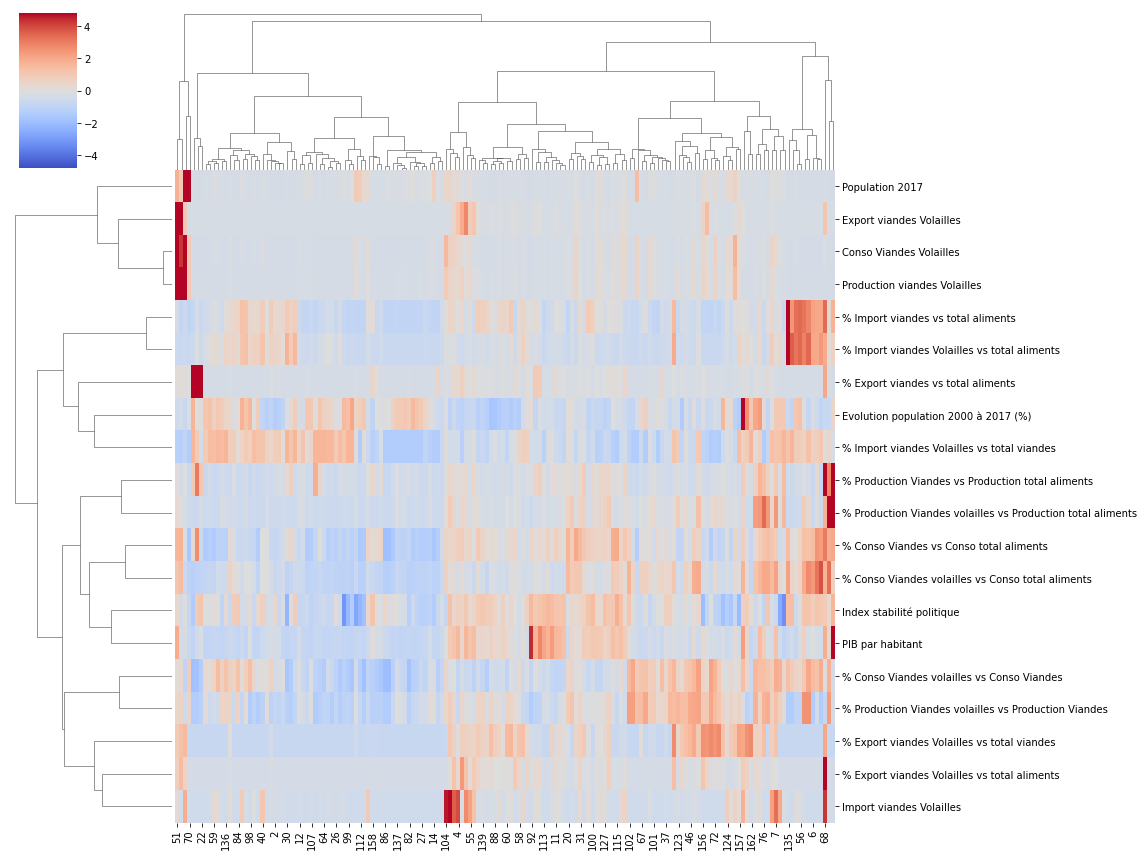

In [105]:
metric = 'euclidean'
method = 'ward'
cmap = 'coolwarm'

clustergrid = sns.clustermap(X_scaled.T, figsize=(16, 12), metric=metric, method=method, cmap=cmap, 
                             row_cluster=True, col_cluster=True,
                             center=0.0, vmin=-4.8, vmax=4.8)

### Nettoyage du Dataset pour garder uniquement les données pertinantes

In [106]:
df.columns

Index(['Code ISO', 'Zone', 'Population 2017',
       'Evolution population 2000 à 2017 (%)', 'Index stabilité politique',
       'PIB par habitant', 'Export viandes Volailles',
       '% Export viandes vs total aliments',
       '% Export viandes Volailles vs total aliments',
       '% Export viandes Volailles vs total viandes',
       'Import viandes Volailles', '% Import viandes vs total aliments',
       '% Import viandes Volailles vs total aliments',
       '% Import viandes Volailles vs total viandes',
       'Conso Viandes Volailles', '% Conso Viandes vs Conso total aliments',
       '% Conso Viandes volailles vs Conso total aliments',
       '% Conso Viandes volailles vs Conso Viandes',
       'Production viandes Volailles',
       '% Production Viandes vs Production total aliments',
       '% Production Viandes volailles vs Production total aliments',
       '% Production Viandes volailles vs Production Viandes'],
      dtype='object')

In [107]:
df= df[['Zone',
       'Evolution population 2000 à 2017 (%)', 'Index stabilité politique',
       'PIB par habitant','% Import viandes Volailles vs total viandes',
       '% Conso Viandes vs Conso total aliments',
       '% Conso Viandes volailles vs Conso total aliments']]

In [108]:
df = df.set_index("Zone")

In [109]:
# Données
X = df.select_dtypes('number') 
print('X', X.shape)

X (162, 6)


In [110]:
scaler = preprocessing.StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, index=X.index, columns=X.columns)
print('X_scaled', X_scaled.shape)

X_scaled (162, 6)


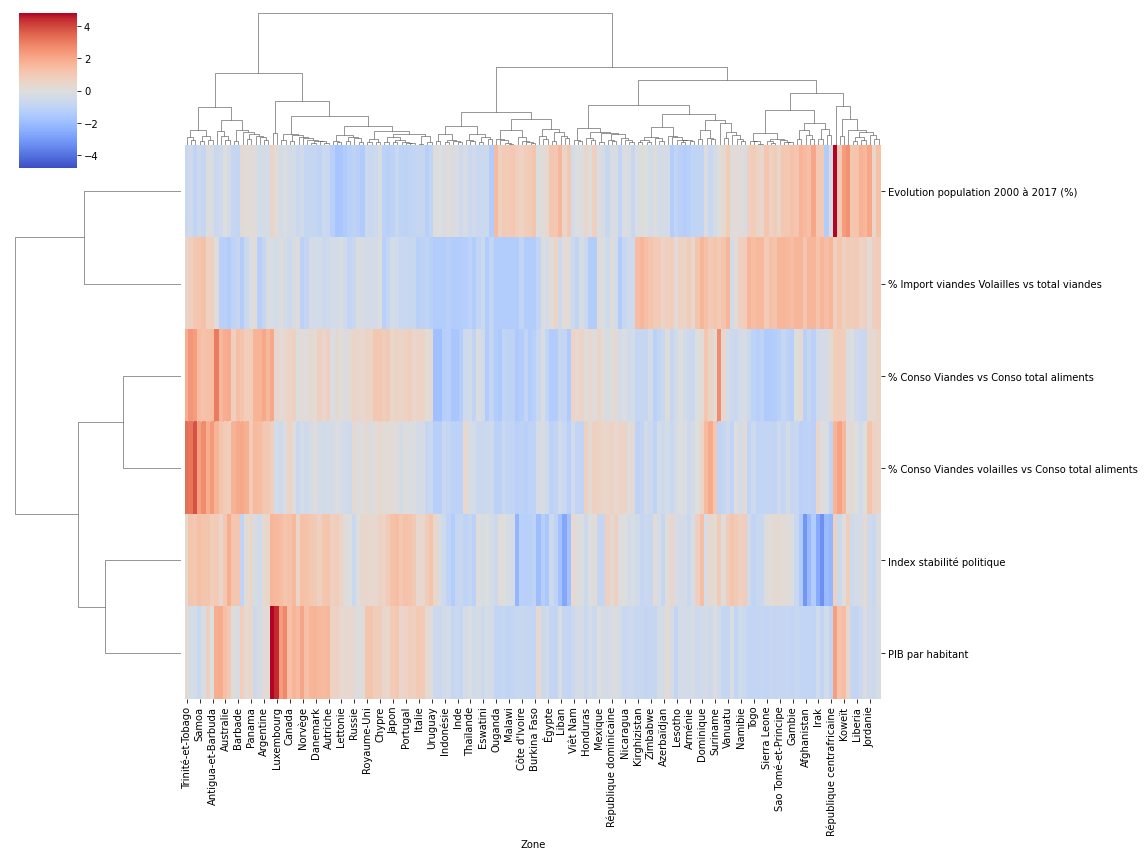

In [111]:
metric = 'euclidean'
method = 'ward'
cmap = 'coolwarm'

clustergrid = sns.clustermap(X_scaled.T, figsize=(16, 12), metric=metric, method=method, cmap=cmap, 
                             row_cluster=True, col_cluster=True,
                             center=0.0, vmin=-4.8, vmax=4.8)

## Corrélation

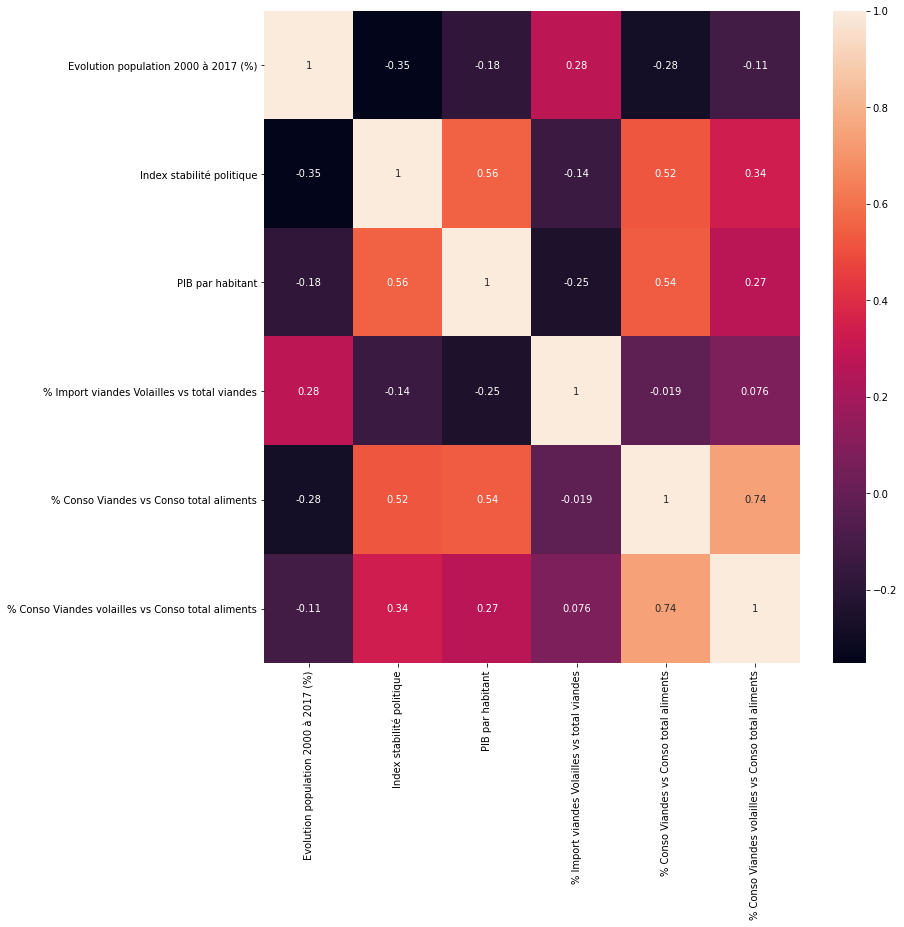

In [112]:
# Heatmap
plt.figure(figsize= [12,12])
sns.heatmap(df.corr(), annot = True)
plt.show()

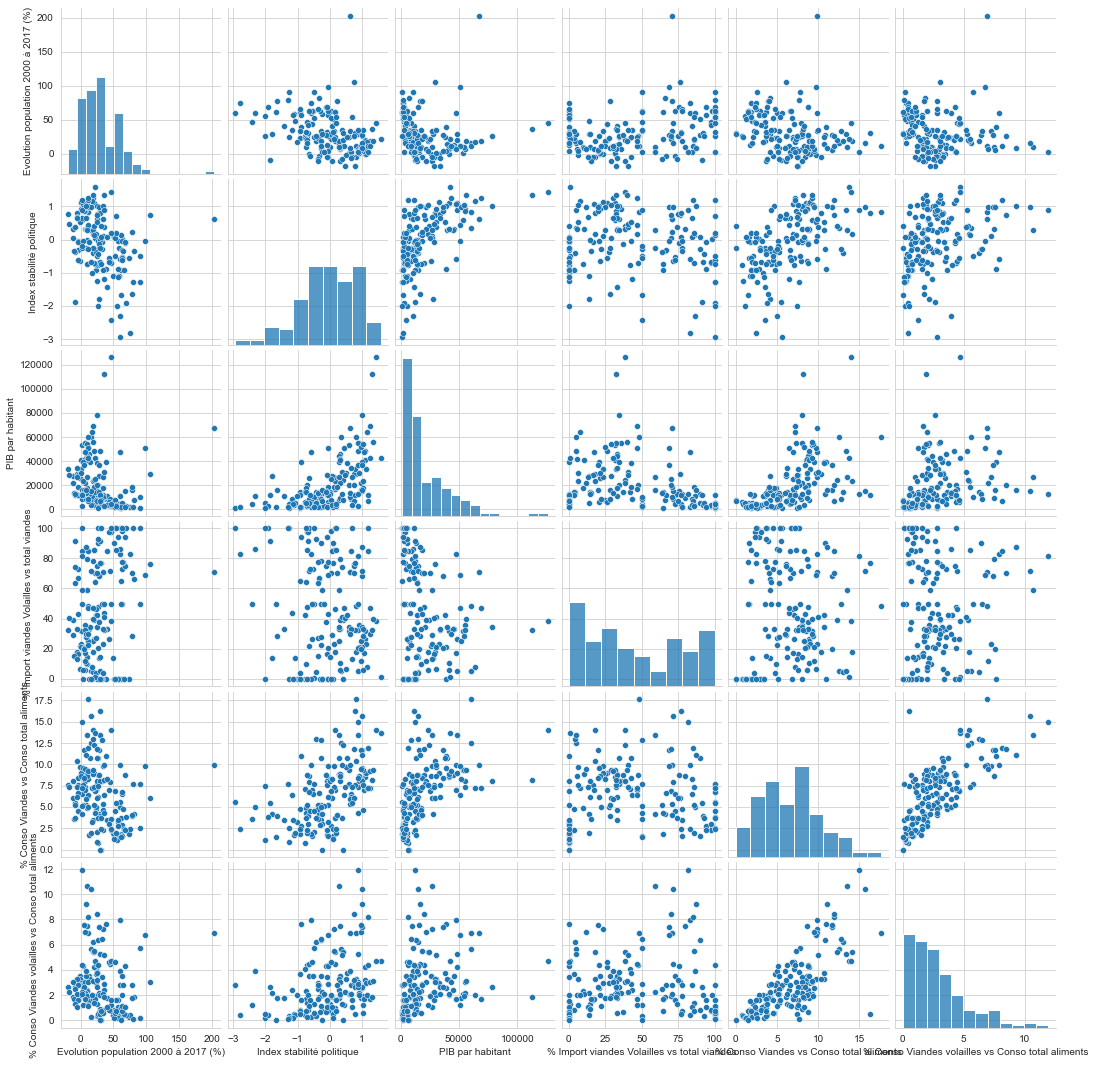

In [113]:
sns.set_style("whitegrid");
sns.pairplot(df);
plt.show()

## Algorithme du K-means

In [114]:
X = df.iloc[:,2:].values
X.shape

(162, 4)

In [115]:
df.describe()

Evolution population 2000 à 2017 (%)  Index stabilité politique  \
count                            162.000000                 162.000000   
mean                              29.920247                  -0.046481   
std                               29.283756                   0.893254   
min                              -18.750000                  -2.940000   
25%                                9.247500                  -0.610000   
50%                               25.325000                   0.015000   
75%                               47.992500                   0.650000   
max                              202.710000                   1.590000   

       PIB par habitant  % Import viandes Volailles vs total viandes  \
count        162.000000                                   162.000000   
mean       20197.433951                                    44.995988   
std        20868.654282                                    33.352513   
min          912.800000                                     0.000000   
25%         4909.825000                                    16.495000   
50%        12645.900000                                    38.730000   
75%        28970.550000                                    75.187500   
max       126184.000000                                   100.000000   

       % Conso Viandes vs Conso total aliments  \
count                               162.000000   
mean                                  6.649506   
std                                   3.614682   
min                                   0.000000   
25%                                   3.735000   
50%                                   6.665000   
75%                                   8.792500   
max                                  17.670000   

       % Conso Viandes volailles vs Conso total aliments  
count                                         162.000000  
mean                                            2.854568  
std                                             2.374651  
min                                             0.000000  
25%                                             1.092500  
50%                                             2.130000  
75%                                             3.902500  
max                                            11.940000

In [116]:
imputer = SimpleImputer(strategy='mean')
imputer.fit(X)

SimpleImputer()

In [117]:
X = imputer.transform(X)

In [118]:
scaler = StandardScaler()
x = scaler.fit(X)
X= scaler.transform(X)
X

array([[ 1.91847662e+00, -1.19508837e+00,  1.63188001e+00,
         1.16817486e+00],
       [-2.68034755e-01, -9.13278891e-01, -1.30291394e-01,
        -6.69353765e-01],
       [-2.72678061e-01, -1.21854743e+00,  1.75120815e+00,
         1.42585129e+00],
       [ 2.75376181e-01, -7.05455678e-01,  5.52376582e-01,
         2.68419465e-01],
       [-2.28864944e-02,  8.31296568e-02,  5.71802093e-01,
         6.40149394e-01],
       [-6.73641423e-01, -1.35328665e+00, -1.64825636e+00,
        -1.02841108e+00],
       [ 9.98318648e-01, -3.90863664e-01,  5.19075705e-01,
         1.45917556e-01],
       [-2.72134900e-01, -1.23990119e+00, -5.16026551e-01,
         3.44455132e-01],
       [ 1.22798922e+00, -3.56878102e-01,  6.05102970e-01,
         2.85316280e-01],
       [-3.60319249e-01,  1.35412951e+00,  1.14901729e+00,
         1.50188696e+00],
       [-4.45191758e-01, -1.33885031e+00, -1.27362150e+00,
        -6.69353765e-01],
       [ 1.63412917e-01, -8.18540379e-01,  2.06201633e+00,
      

### K value

In [119]:
k = 4
kmeans = KMeans(n_clusters=k, init='random', random_state=42)
y_pred = kmeans.fit_predict(X)
y_pred

array([2, 3, 1, 2, 2, 3, 2, 3, 2, 1, 3, 1, 3, 2, 3, 2, 3, 1, 2, 2, 3, 1,
       0, 2, 3, 2, 2, 0, 3, 2, 3, 1, 0, 1, 0, 1, 1, 1, 3, 2, 0, 2, 0, 3,
       2, 0, 1, 0, 3, 2, 2, 3, 0, 2, 0, 3, 3, 3, 1, 2, 2, 2, 3, 2, 0, 2,
       2, 1, 2, 1, 3, 2, 2, 3, 0, 2, 0, 0, 2, 0, 2, 0, 0, 3, 2, 3, 2, 1,
       3, 3, 3, 0, 0, 3, 3, 0, 0, 0, 3, 0, 3, 0, 0, 2, 0, 0, 1, 0, 0, 3,
       3, 3, 0, 2, 0, 0, 3, 3, 0, 2, 3, 0, 2, 3, 3, 0, 2, 0, 0, 1, 3, 0,
       1, 0, 1, 1, 2, 2, 0, 2, 3, 1, 0, 2, 1, 0, 3, 0, 0, 3, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 3, 3])

In [120]:
kmeans.inertia_

226.71147525047544

In [121]:
kmeans_per_k = [KMeans(n_clusters=k,init = 'random', random_state=42).fit(X)
               for k in range(1,10)]
inertias = [model.inertia_ for model in kmeans_per_k]

C:\Users\perso\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.



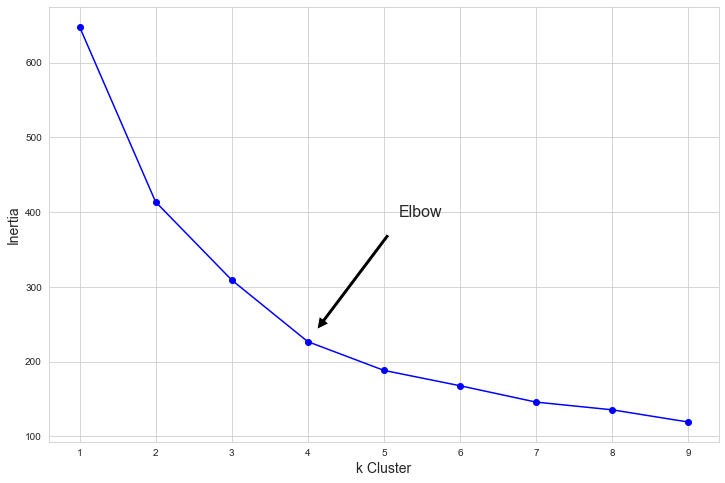

In [122]:
# plot inertia as a function of k and analyze the resulting curve.
plt.figure(figsize=(12,8))
plt.plot(range(1,10), inertias, 'bo-')
plt.xlabel('k Cluster', fontsize=14)
plt.ylabel('Inertia', fontsize=14)
plt.annotate('Elbow',
            xy=(4,inertias[3]), 
            xytext=(0.55, 0.55),
            textcoords="figure fraction",
            fontsize=16,
            arrowprops=dict(facecolor='black', shrink=0.1))

plt.show()

In [123]:
# plot the silhouette score as a function of k
silhouette_score(X, kmeans.labels_)

0.37638145211308205

In [124]:
silhouette_scores = [silhouette_score(X, model.labels_)
                    for model in kmeans_per_k[1:]]   # kmeans_per_k[0] is 1 cluster, not considered

In [125]:
silhouette_scores

[0.33102648399499746,
 0.3392625313774173,
 0.37638145211308205,
 0.35680080856288626,
 0.36133218573917597,
 0.36935652386488804,
 0.316810350487341,
 0.3363960664250584]

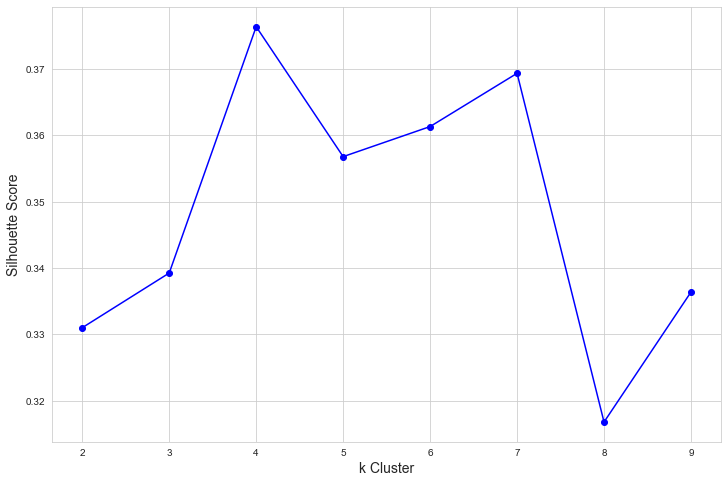

In [126]:
# plot the silhouette score as a function of k
plt.figure(figsize=(12,8))
plt.plot(range(2,10), silhouette_scores, 'bo-')
plt.xlabel('k Cluster', fontsize=14)
plt.ylabel('Silhouette Score', fontsize=14)
plt.show()

In [130]:
np.unique(kmeans.labels_,return_counts=True)

(array([0, 1, 2, 3]), array([49, 29, 41, 43], dtype=int64))

In [131]:
df_Kmeans = df.copy()
df_Kmeans['labels'] = kmeans.labels_

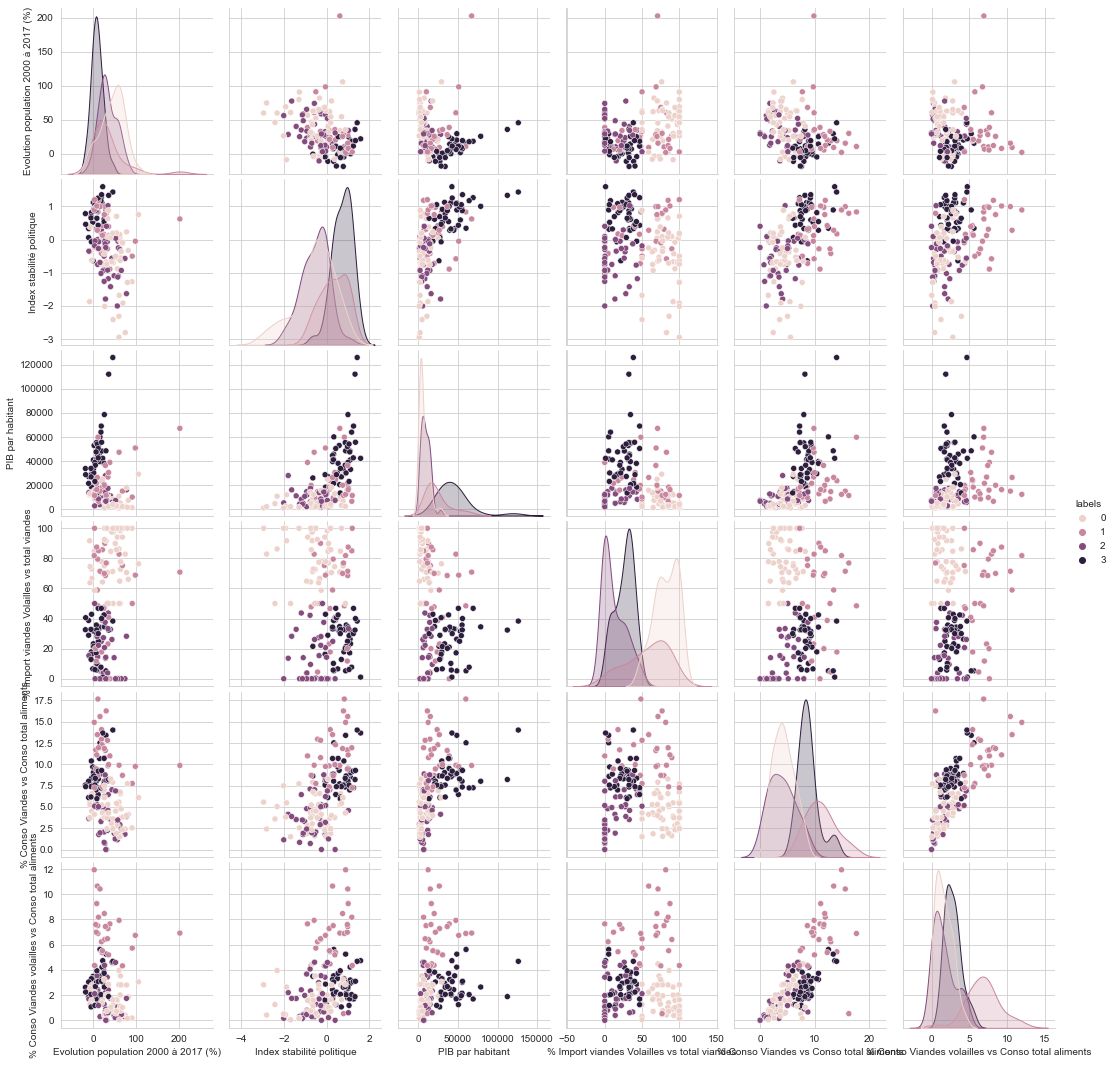

In [132]:
sns.set_style("whitegrid");
sns.pairplot(df_Kmeans,hue='labels')

In [143]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

### kmeans avec 4 Clusters

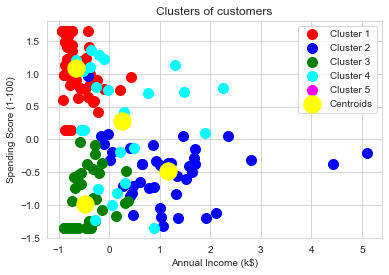

In [144]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

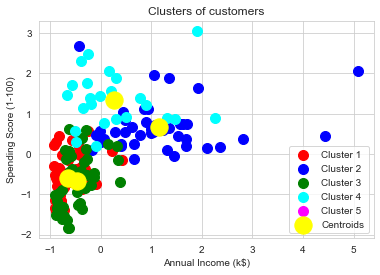

In [147]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 2], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 2], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 2], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 2], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 2], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 2], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

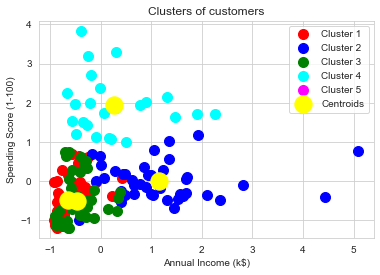

In [148]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 3], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 3], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 3], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 3], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 3], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 3], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

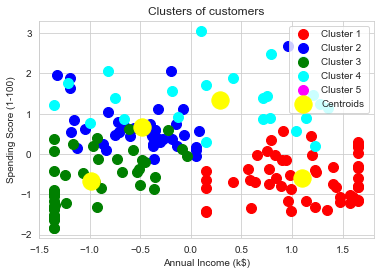

In [151]:
plt.scatter(X[y_kmeans == 0, 1], X[y_kmeans == 0, 2], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 1], X[y_kmeans == 1, 2], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 1], X[y_kmeans == 2, 2], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 1], X[y_kmeans == 3, 2], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 1], X[y_kmeans == 4, 2], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 2], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

### Moyenne par groupe

In [133]:
gb=df_Kmeans.groupby(kmeans.labels_)

In [134]:
gb.size()

0    49
1    29
2    41
3    43
dtype: int64

In [135]:
gb.mean()

Evolution population 2000 à 2017 (%)  Index stabilité politique  \
0                             44.068571                  -0.543265   
1                             33.913103                   0.322414   
2                             33.022927                  -0.531707   
3                              8.146512                   0.733488   

   PIB par habitant  % Import viandes Volailles vs total viandes  \
0       6493.579592                                    81.756531   
1      23668.810345                                    56.992759   
2       8816.363415                                    12.353171   
3      44324.011628                                    26.139767   

   % Conso Viandes vs Conso total aliments  \
0                                 4.320816   
1                                11.186207   
2                                 4.009756   
3                                 8.760465   

   % Conso Viandes volailles vs Conso total aliments  labels  
0                                           1.616939       0  
1                                           6.768621       1  
2                                           1.641707       2  
3                                           2.781628       3

### Visualisation de chaque groupe

In [136]:
df_Kmeans[df_Kmeans['labels']==0]

Evolution population 2000 à 2017 (%)  \
Zone                                                              
Pakistan                                                  46.06   
Ukraine                                                   -8.91   
Irak                                                      59.82   
Pérou                                                     18.84   
Guatemala                                                 45.18   
Kazakhstan                                                21.16   
Angola                                                    81.86   
Cuba                                                       1.91   
Yémen                                                     59.89   
Ghana                                                     51.05   
Bénin                                                     62.76   
Azerbaïdjan                                               21.21   
République du Congo                                       63.42   
Tanzanie                                                  63.17   
Mozambique                                                61.75   
Oman                                                     105.73   
Haïti                                                     29.76   
Zimbabwe                                                  19.82   
Moldavie                                                  -3.40   
Géorgie                                                   -8.10   
Zambie                                                    61.81   
Afghanistan                                               74.67   
Togo                                                      56.33   
Mali                                                      69.12   
Liberia                                                   65.08   
Guinée                                                    46.44   
Arménie                                                   -4.07   
Albanie                                                   -7.83   
Macédoine du Nord                                          2.32   
Tadjikistan                                               42.85   
Cambodge                                                  31.71   
Sierra Leone                                              63.34   
Namibie                                                   33.88   
Mauritanie                                                62.82   
Niger                                                     90.64   
Kirghizistan                                              25.79   
Éthiopie                                                  60.66   
République centrafricaine                                 26.25   
Cap-Vert                                                  25.53   
Gambie                                                    68.01   
Maldives                                                  77.67   
Tchad                                                     79.72   
Timor oriental                                            40.58   
Guinée-Bissau                                             52.18   
Vanuatu                                                   54.35   
Îles Salomon                                              54.13   
Djibouti                                                  31.57   
Kiribati                                                  35.26   
Sao Tomé-et-Principe                                      45.57   

                           Index stabilité politique  PIB par habitant  \
Zone                                                                     
Pakistan                                       -2.41            4571.2   
Ukraine                                        -1.87           11871.1   
Irak                                           -2.31           10719.0   
Pérou                                          -0.26           12506.5   
Guatemala                                      -0.65            8322.2   
Kazakhstan                                      0.04           24863.0   
Angola           

In [137]:
df_Kmeans[df_Kmeans['labels']==1]

Evolution population 2000 à 2017 (%)  \
Zone                                                                    
Brésil                                                          18.90   
Mexique                                                         26.17   
Afrique du Sud                                                  26.78   
Argentine                                                       19.17   
Arabie saoudite                                                 60.19   
Malaisie                                                        34.10   
Chili                                                           20.39   
Israël                                                          38.65   
Émirats arabes unis                                            202.71   
Bolivie                                                         32.96   
Hong Kong                                                       10.60   
République dominicaine                                          24.10   
Jordanie                                                        91.04   
Koweït                                                          98.33   
Jamaïque                                                        10.03   
Panama                                                          35.52   
Trinité-et-Tobago                                                9.23   
Gabon                                                           68.10   
Maurice                                                          6.70   
Suriname                                                        21.14   
Bahamas                                                         28.08   
Barbade                                                          5.42   
Samoa                                                           11.98   
Sainte-Lucie                                                    15.46   
Mongolie                                                        29.88   
Saint-Vincent-et-les-Grenadines                                  1.90   
Antigua-et-Barbuda                                              25.53   
Grenade                                                          7.82   
Dominique                                                        2.60   

                                 Index stabilité politique  PIB par habitant  \
Zone                                                                           
Brésil                                               -0.42           14524.6   
Mexique                                              -0.72           19721.3   
Afrique du Sud                                       -0.28           12701.3   
Argentine                                             0.17           23597.1   
Arabie saoudite                                      -0.58           47306.2   
Malaisie                                              0.12           26661.5   
Chili                                                 0.42           24470.7   
Israël                                               -0.89           38834.0   
Émirats arabes unis                                   0.62           67183.6   
Bolivie                                              -0.28            8423.7   
Hong Kong                                             0.83           59849.2   
République dominicaine                                0.16           16735.4   
Jordanie                                             -0.50           10003.6   
Koweït                                               -0.05           50855.6   
Jamaïque                                              0.31            9600.1   
Panama                                                0.39           30446.8   
Trinité-et-Tobago                                     0.28           26342.6   
Gabon                                                -0.10           15006.8   
Maurice                                               0.97           21415.1   
Suriname                                              0.13           18283.7   
Bahamas  

In [138]:
df_Kmeans[df_Kmeans['labels']==2]

Evolution population 2000 à 2017 (%)  \
Zone                                                       
Chine                                              10.11   
Inde                                               26.70   
Iran                                               22.93   
Indonésie                                          25.12   
Turquie                                            28.27   
Colombie                                           23.42   
Philippines                                        34.85   
Égypte                                             40.11   
Viêt Nam                                           18.38   
Thaïlande                                           9.94   
Maroc                                              23.57   
Équateur                                           32.36   
Algérie                                            33.33   
Bangladesh                                         25.09   
Honduras                                           43.42   
Tunisie                                            17.77   
Nigeria                                            56.09   
Sri Lanka                                          12.52   
Nicaragua                                          25.95   
Salvador                                            8.50   
Malawi                                             58.49   
Cameroun                                           58.35   
Sénégal                                            57.38   
Liban                                              77.46   
Madagascar                                         62.18   
Ouganda                                            74.06   
Côte d'Ivoire                                      48.51   
Bosnie-Herzégovine                                -10.65   
Népal                                              15.42   
Burkina Faso                                       65.35   
Paraguay                                           29.00   
Kenya                                              57.12   
Guyana                                              3.82   
Turkménistan                                       27.49   
Rwanda                                             51.01   
Lesotho                                             2.89   
Belize                                             51.94   
Botswana                                           34.18   
Eswatini                                           11.87   
Laos                                               30.61   
Ouzbékistan                                        29.03   

                    Index stabilité politique  PIB par habitant  \
Zone                                                              
Chine                                    0.00           14621.2   
Inde                                    -0.76            6182.9   
Iran                                    -0.93           14535.9   
Indonésie                               -0.50           10935.6   
Turquie                                 -1.79           27913.8   
Colombie                                -0.77           14171.3   
Philippines                             -1.18            8120.9   
Égypte                                  -1.42           11014.5   
Viêt Nam                                 0.29            7155.4   
Thaïlande                               -0.75           17423.0   
Maroc                                   -0.37            7312.1   
Équateur                                -0.07           11617.9   
Algérie                                 -0.92           11737.4   
Bangladesh                              -1.26            4160.7   
Honduras                                -0.56            5562.0   
Tunisie                                 -1.02           10605.3   
Nigeria                                 -2.00            5190.4   
Sri Lanka                               -0.07           12584.1   
Nicaragua                               -0.05            6004.0   
Salvador                        

In [139]:
df_Kmeans[df_Kmeans['labels']==3]

Evolution population 2000 à 2017 (%)  \
Zone                                                     
États-Unis                                       15.40   
Russie                                           -0.60   
Japon                                            -0.02   
Royaume-Uni                                      13.24   
Allemagne                                         1.54   
France                                            9.87   
Canada                                           20.09   
Espagne                                          14.26   
Australie                                        29.45   
Pologne                                          -1.57   
Italie                                            7.02   
Corée du Nord                                     7.85   
Roumanie                                        -11.22   
Pays-Bas                                          6.88   
Portugal                                         -0.08   
Biélorussie                                      -4.27   
Hongrie                                          -4.80   
Tchéquie                                          3.42   
Danemark                                          7.32   
Suède                                            11.52   
Nouvelle-Zélande                                 21.85   
Grèce                                            -4.63   
Autriche                                          9.30   
Bulgarie                                        -11.20   
Belgique                                         11.07   
Suisse                                           18.37   
Costa Rica                                       24.92   
Irlande                                          25.64   
Finlande                                          6.23   
Norvège                                          17.71   
Lituanie                                        -18.75   
Slovaquie                                         0.90   
Slovénie                                          4.46   
Croatie                                          -5.54   
Lettonie                                        -18.16   
Uruguay                                           3.52   
Chypre                                           25.06   
Estonie                                          -5.70   
Fidji                                             8.19   
Macao                                            45.54   
Malte                                            11.25   
Luxembourg                                       35.73   
Islande                                          19.24   

                  Index stabilité politique  PIB par habitant  \
Zone                                                            
États-Unis                             0.34           60109.7   
Russie                                -0.64           25926.4   
Japon                                  1.11           40966.6   
Royaume-Uni                            0.33           45744.7   
Allemagne                              0.59           52952.9   
France                                 0.28           44577.1   
Canada                                 1.10           48317.1   
Espagne                                0.28           39528.9   
Australie                              0.89           48482.6   
Pologne                                0.52           30064.5   
Italie                                 0.31           41581.1   
Corée du Nord                          0.32           40957.4   
Roumanie                               0.06           27141.9   
Pays-Bas                               0.92           55088.6   
Portugal                               1.12           33044.7   
Biélorussie                           -0.05           18280.2   
Hongrie                                0.81           29465.1   
Tchéquie                               1.00           38824.9   
Danemark                               0.87           55356.7   
Suède                                  0.9

### Centroide

In [140]:
centroids = kmeans.cluster_centers_
centroids = pd.DataFrame(centroids, columns=["Centroids_Evolution population 2000 à 2017 (%)",
                         'Centroids_Index stabilité politique', 'Centroids_PIB par habitant',
                         'Centroids_% Import viandes Volailles vs total viandes', 
                         'Centroids_% Conso Viandes vs Conso total aliments',
                         'Centroids_% Conso Viandes volailles vs Conso total aliments'])
centroids

Centroids_Evolution population 2000 à 2017 (%)  \
0                                        0.484644   
1                                        0.136773   
2                                        0.106281   
3                                       -0.745849   

   Centroids_Index stabilité politique  Centroids_PIB par habitant  \
0                            -0.557875                   -0.658708   
1                             0.414260                    0.166860   
2                            -0.544896                   -0.547058   
3                             0.875886                    1.159701   

   Centroids_% Import viandes Volailles vs total viandes  \
0                                           1.105600       
1                                           0.360812       
2                                          -0.981756       
3                                          -0.567114       

   Centroids_% Conso Viandes vs Conso total aliments  \
0                                          -0.646228   
1                                           1.258968   
2                                          -0.732550   
3                                           0.585807   

   Centroids_% Conso Viandes volailles vs Conso total aliments  
0                                          -0.522800            
1                                           1.653376            
2                                          -0.512337            
3                                          -0.030811

### Visualisation des clusters avec centroide

In [141]:
samples=df.values

In [142]:
x=samples[:,0]
y=samples[:,1]
centroids=model.cluster_centers_
plt.figure(figsize= [12,6])
plt.scatter(x,y,c=y_kmeans)
plt.scatter(centroids[:,0],centroids[:,1],marker='D',s=150,color='red')
plt.show()

NameError: name 'model' is not defined

In [ ]:
x=samples[:,0]
y=samples[:,2]
centroids=model.cluster_centers_
plt.figure(figsize= [12,6])
plt.scatter(x,y,c=samples)
plt.scatter(centroids[:,0],centroids[:,2],marker='D',s=170,color='red')
plt.show()

In [ ]:
y_kmeans

In [ ]:
model=KMeans(n_clusters=4,random_state=random_state).fit(X)

## Analyse en Composante Principale (ACP)

In [ ]:
pca = PCA() # instanciation de l'objet pca
X_pca = pca.fit_transform(X_scaled) # réalisation de l'ACP sur les données X_scaled

In [ ]:
# Conversion en dataframe pandas
pca_columns = ['PC' + str(c) for c in range(1, X_pca.shape[1]+1, 1)] # création d'une liste avec les noms de colonnes de PC1 à PC6
X_pca = pd.DataFrame(X_pca, index=X.index, columns=pca_columns) # création du dataframe
X_pca.head()

### Calcul de la variance expliquée

In [ ]:
pca.explained_variance_ratio_

In [ ]:
explained_variance = pd.Series(dict(zip(X_pca.columns, 100.0*pca.explained_variance_ratio_)))
print(explained_variance.head())

In [ ]:
explained_variance.plot(kind='bar', figsize=(15, 4), rot=90, ylabel='Explained variance')

In [ ]:
explained_variance['PC1'] + explained_variance['PC2']

In [ ]:
explained_variance['PC1'] + explained_variance['PC2'] + explained_variance['PC3']

### Visualisation des deux premières composantes principales de l’ACP

In [ ]:
X_pca.plot(x='PC1', y='PC2', kind='scatter', figsize=(5, 5), color='gray')

### Visualisation des trois premières composantes principales de l’ACP

In [ ]:
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(projection='3d')
ax.scatter(X_pca['PC1'], X_pca['PC2'], X_pca['PC3'], marker='o', s=30, edgecolor='k')
ax.set_xlabel('PC1 - ' + '{:.1f}%'.format(explained_variance['PC1']))
ax.set_ylabel('PC2 - ' + '{:.1f}%'.format(explained_variance['PC2']))
ax.set_zlabel('PC3 - ' + '{:.1f}%'.format(explained_variance['PC3']))
ax.view_init(elev=15, azim=45)

### Visualiser les données avec la méthode t-SNE
#### Projection 2D

In [ ]:
tsne = TSNE(n_components=2, init='pca', random_state=0, n_jobs=-1)
X_tsne = tsne.fit_transform(X_scaled)

In [ ]:
columns = ['DIM' + str(c) for c in range(1, X_tsne.shape[1]+1, 1)]
X_tsne = pd.DataFrame(X_tsne, index=X.index, columns=columns)
X_tsne.head()

In [ ]:
X_tsne.plot(x='DIM1', y='DIM2', kind='scatter', figsize=(5, 5))

#### Projection 3D

In [ ]:
tsne = TSNE(n_components=3, init='pca', perplexity=45, random_state=0, n_jobs=-1)
X_tsne = tsne.fit_transform(X_scaled)

In [ ]:
columns = ['DIM' + str(c) for c in range(1, X_tsne.shape[1]+1, 1)]
X_tsne = pd.DataFrame(X_tsne, index=X.index, columns=columns)
X_tsne.head()

In [ ]:
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(projection='3d')
ax.scatter(X_tsne['DIM1'], X_tsne['DIM2'], X_tsne['DIM3'], marker='o', s=30, edgecolor='k')
ax.set_xlabel('DIM1')
ax.set_ylabel('DIM2')
ax.set_zlabel('DIM3')
ax.view_init(elev=15, azim=45)

### Visualiser les données avec la méthode UMAP